## Problem Statement:

People often spend a lot of time browsing through online shopping websites, but the coversion rate into purchases is low. Determine the likelihood of purchase based on the given features in the datsaset. The dataset consists of feature vectors belonging to 12,330 online sessions. The purpose of this project is to identify user behaviour patterns to effectively understand features that influence the sales.

- Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


__Data Description:__

The dataset cointains the following features:

The data set provided had features which are more or less related to the purchases of the users. All features are mentioned below with explanations.

The data set provided for model making has a total entry of "12330" with "18" features. Among these features 9 features are numerical, continuous and distinct, and 9 are categorical including the target feature Revenue. 

The categorical features are Special Day, Month, Operating Systems, Browser, Region, Traffic Type, Visitor Type, Weekend. The numerical features are Administrative, Administrative Duration, Informational, Information Duration, Product Related, Product Relation duration, Bounce rates, Exit rates, Page Values.

__Administrative:__ Number of pages visited by the user for user account management related activities.

__Administrative Duration:__ Time spent on Admin pages by the user.

__Informational:__ Number of pages visited by the user about the website

___Informational Duration:__ Time spent on Informational pages by the user

___Product Related:__ Number of product related pages visited by the user

__Product Related Duration:__ Time spent on Product related pages by the user. 

__Bounce Rates:__ Average bounce rate of the pages visited by the user. It represents the percentage of visitors who enter the site and then leave rather than continuing to view other pages within the same site. 

__Exit Rates:__ Average exit rate of the pages visited by the user. It is the percentage of people who left your site from that page. 

__Page Values:__ Average page value of the pages visited by the user. It is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).

__Special Day:__ Closeness of the visiting day to a special event like Mother‟s Day or festivals like Christmas.

__Month:__ Visiting month during the whole year.

__Operating Systems:__ Operating Systems of the visitor.

__Browser:__ Browser of the visitor.

__Region:__ Geographic region from which the session has been started by the visitor.

__Traffic Type:__ Traffic source through which user has entered the website.

__Visitor Type:__ Defines the nature of user.

__Weekend:__ Defines the timing of the user.


__Importing Librabries__

In [6]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

__Importing and reading dataset__

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

__Displaying the top 5 rows from the dataset__

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


__Finding out the datatype of variable features of dataset__

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

__Checking for insights from 5 five summery__

In [9]:
print('The basic distribution of the dataset', df.describe())

The basic distribution of the dataset        Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%   

In [10]:
df['Administrative']=df['Administrative'].astype(object)
df['Informational']=df['Informational'].astype(object)
df['ProductRelated']=df['ProductRelated'].astype(object)
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Browser']=df['Browser'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
df['SpecialDay']=df['SpecialDay'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null object
Administrative_Duration    12330 non-null float64
Informational              12330 non-null object
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null object
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null object
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12330 non-null object
Region                     12330 non-null object
TrafficType                12330 non-null object
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

### Exploratory Data Analysis

#### Univariate Analysis

In [12]:
# Checking the unique visitor types
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [13]:
# Checking the unique Browsers
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

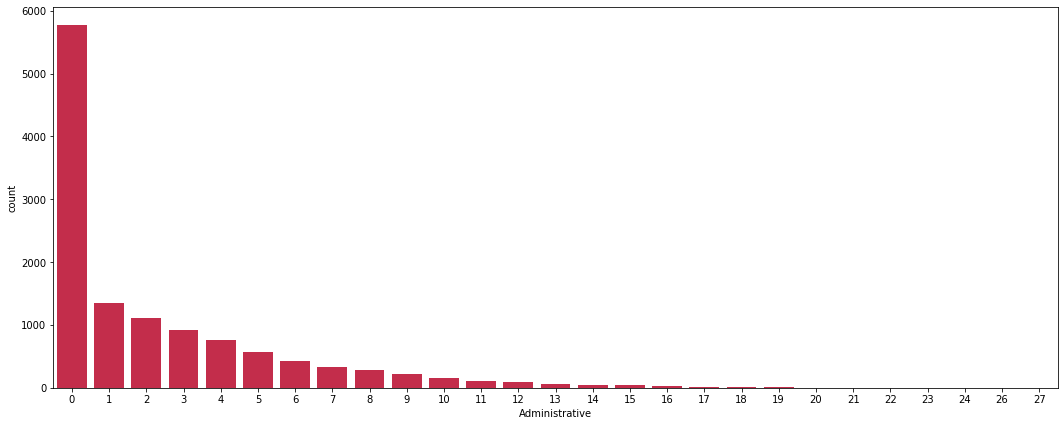

In [14]:
plt.figure(figsize = (18,7))
sns.countplot(df['Administrative'], color = "crimson")
plt.show()

Majority of the users don't spend much time on the Administrative pages which might a sign of a good website design.

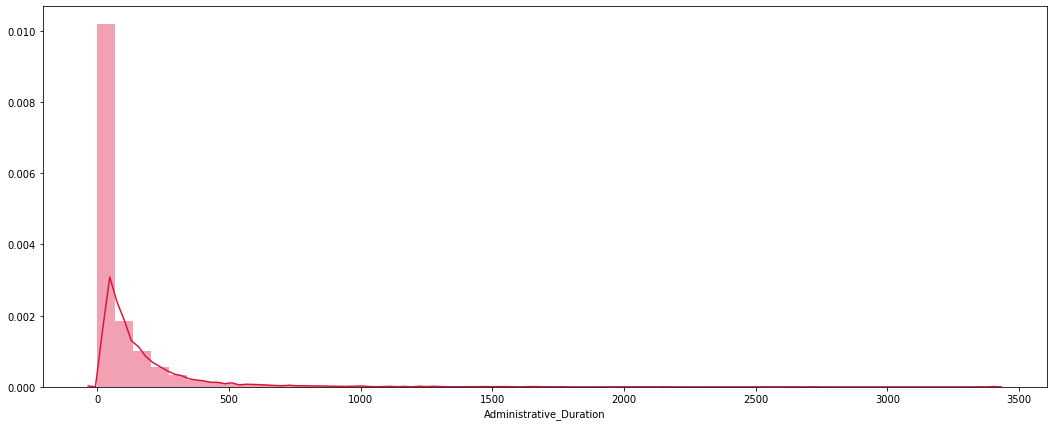

In [15]:
plt.figure(figsize = (18,7))
sns.distplot(df['Administrative_Duration'], color = "crimson")
plt.show()

The distribution for Administrative_Duration is right skewed. A good no. of users do spend time on the Administratve pages.

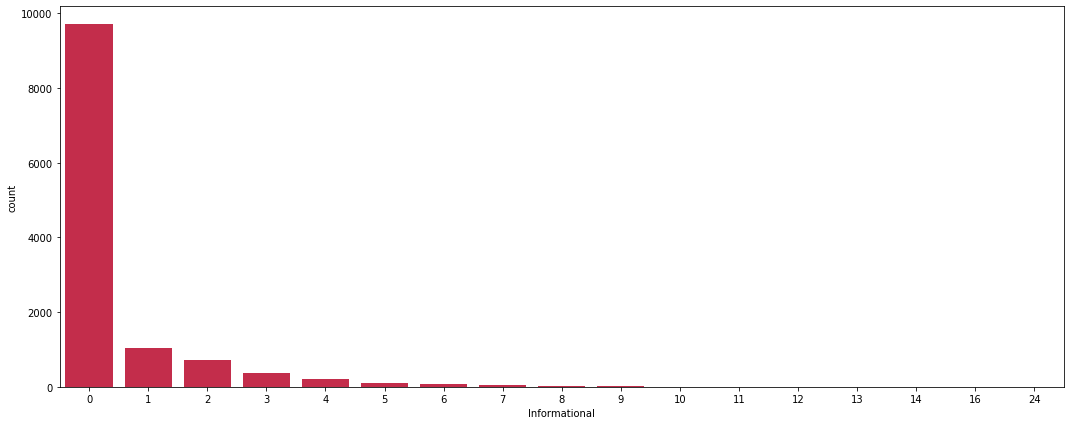

In [16]:
plt.figure(figsize = (18,7))
sns.countplot(df['Informational'], color = "crimson")
plt.show()


Majority of the users doesn't spend time on Informational pages however we do have users who checks out multiple pages. Now the question if its the website's 'ABOUT' sectoin or Google serach pages

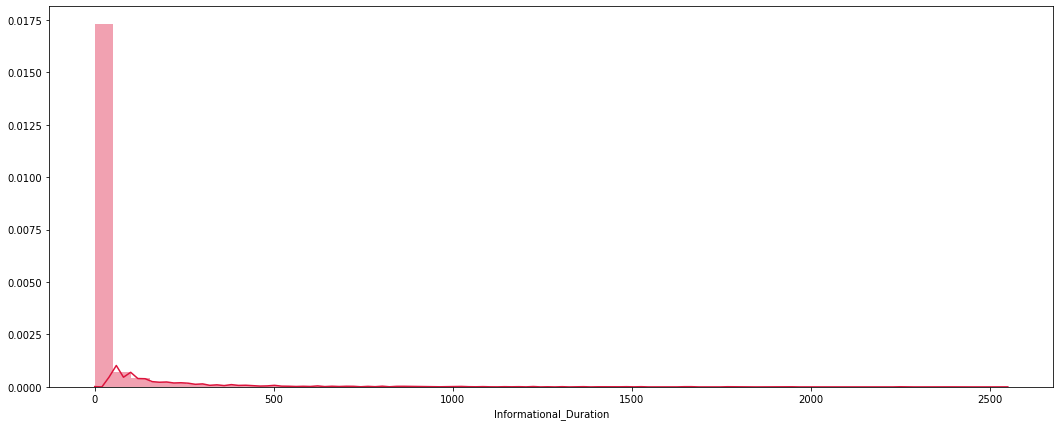

In [17]:
plt.figure(figsize = (18,7))
sns.distplot(df['Informational_Duration'], color = "crimson")
plt.show()

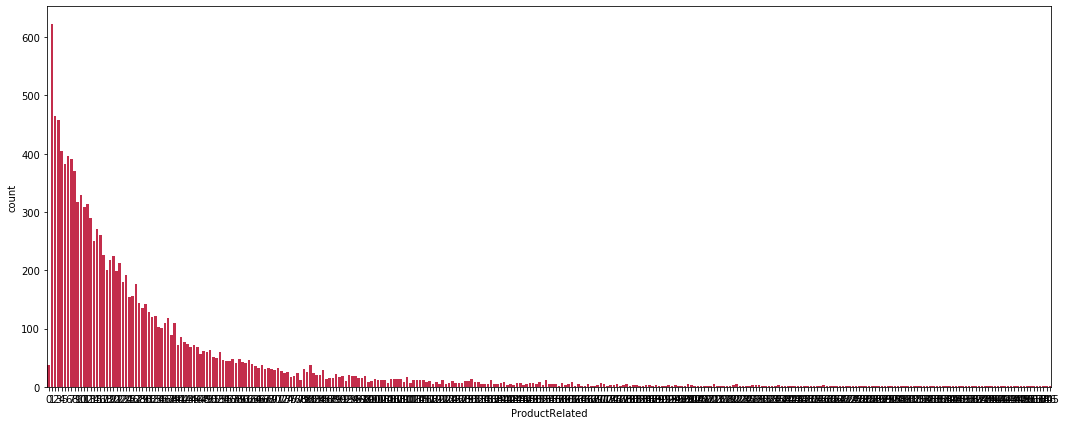

In [18]:
plt.figure(figsize = (18,7))
sns.countplot(df['ProductRelated'], color = "crimson")
plt.show()

__Normalizing the following Variables using Quantile Transformation method__

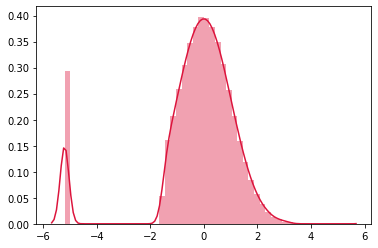

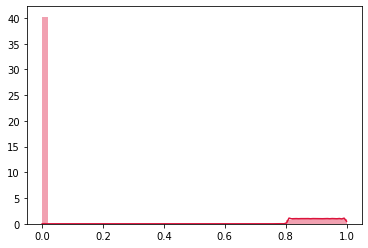

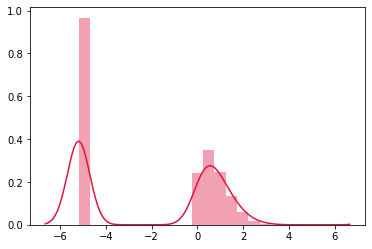

In [19]:
from sklearn.preprocessing import quantile_transform
import scipy.stats as stats
pro_duratn = quantile_transform(df[['ProductRelated_Duration']], output_distribution='normal',random_state=0, copy='warn').flatten()
inf_duration= quantile_transform(df[['Informational_Duration']], output_distribution='uniform',random_state=0, copy='warn').flatten()
adm_duration= quantile_transform(df[['Administrative_Duration']], output_distribution='normal',random_state=0, copy='warn').flatten()

#pro_duratn, _ = stats.boxcox(df[['ProductRelated_Duration']])
#inf_duration, _ = stats.boxcox(df[['Informational_Duration']])
#adm_duration, _ = stats.boxcox(df[['Administrative_Duration']])

sns.distplot(pro_duratn, color = "crimson")
plt.show()
sns.distplot(inf_duration, color = "crimson")
plt.show()
sns.distplot(adm_duration, color = "crimson")
plt.show()

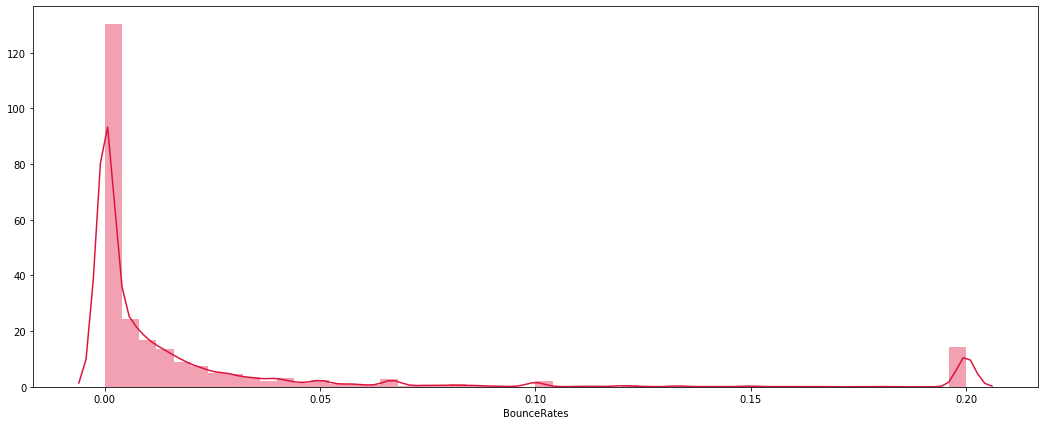

In [20]:
plt.figure(figsize = (18,7))
sns.distplot(df['BounceRates'], color = "crimson")
plt.show()

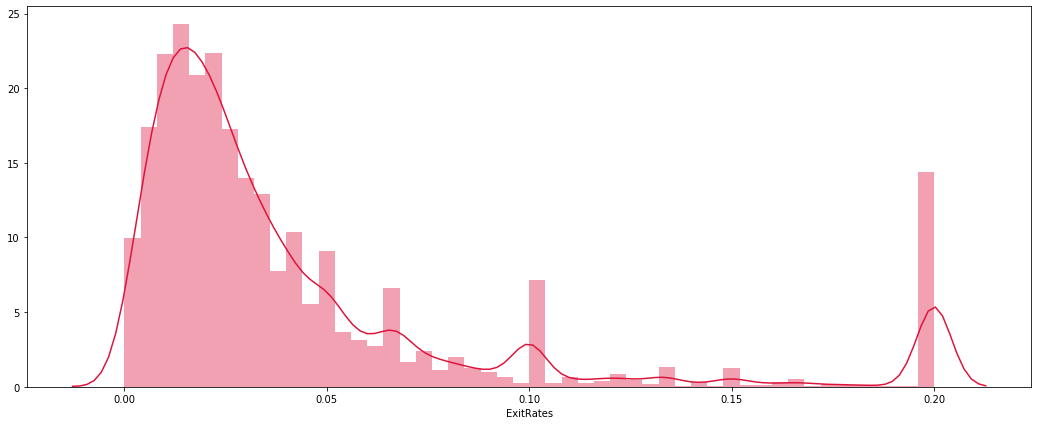

In [22]:
plt.figure(figsize = (18,7))
sns.distplot(df['ExitRates'], color = "crimson")
plt.show()

In [23]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

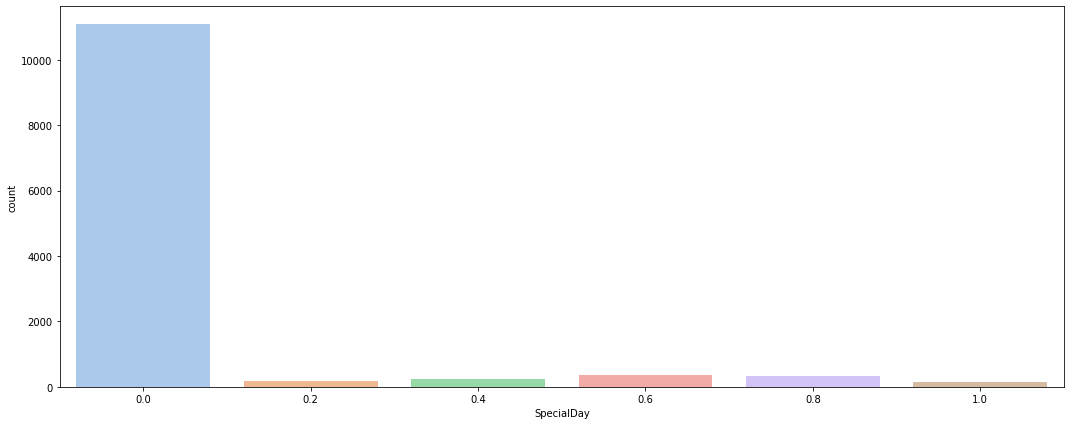

In [25]:
plt.figure(figsize = (18,7))

sns.countplot(df['SpecialDay'], palette = 'pastel')
plt.show()

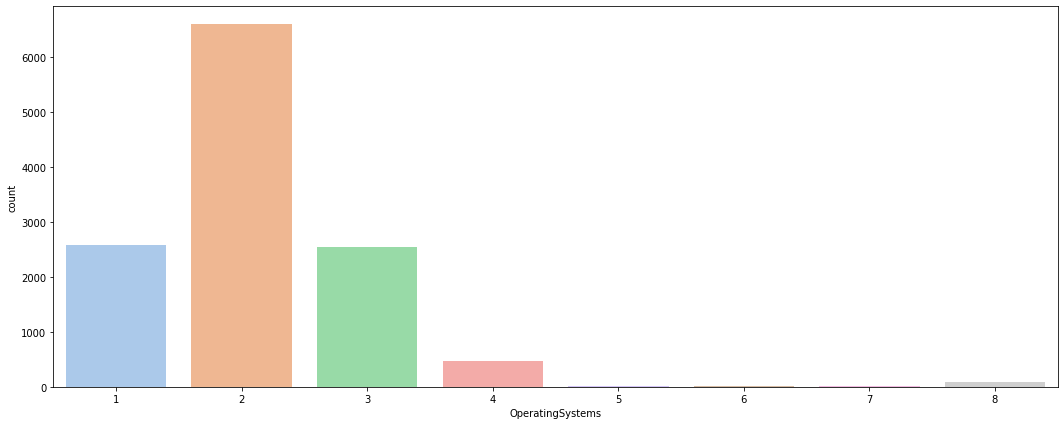

In [26]:
plt.figure(figsize = (18,7))
sns.countplot(df['OperatingSystems'], palette = 'pastel')
plt.show()

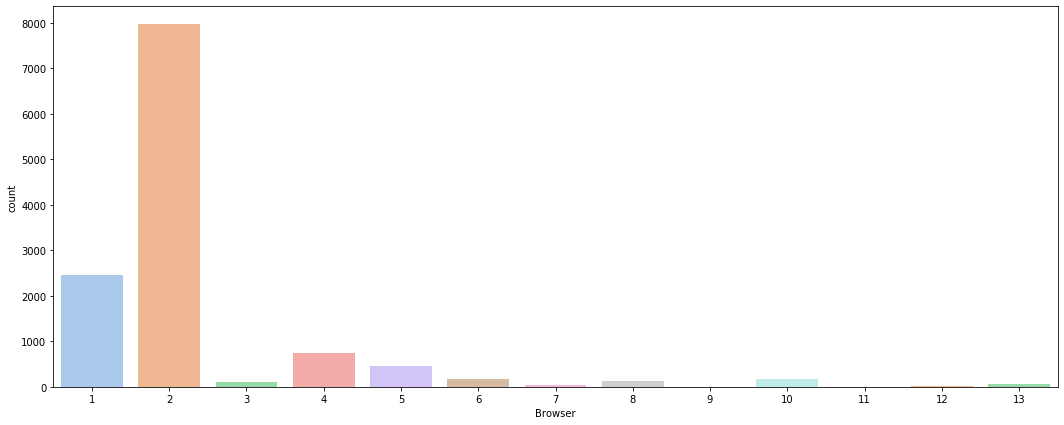

In [27]:
plt.figure(figsize = (18,7))
sns.countplot(df['Browser'], palette = 'pastel')
plt.show()

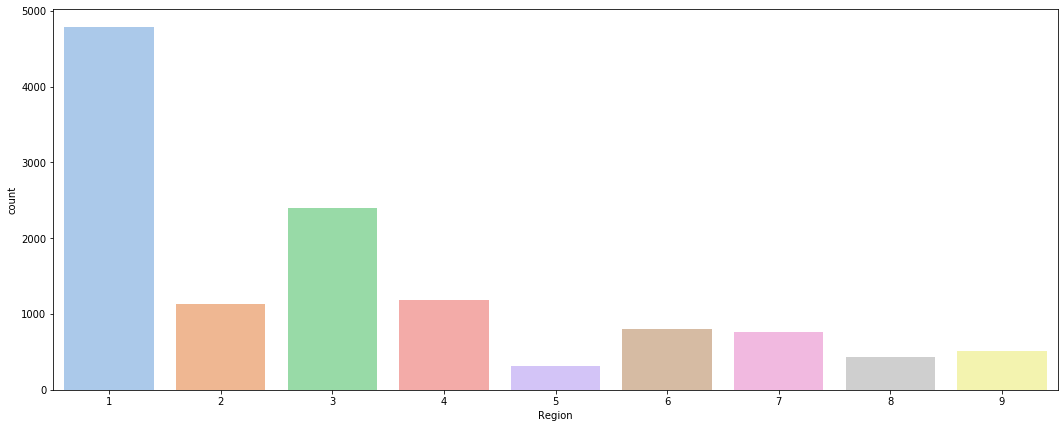

In [28]:
plt.figure(figsize = (18,7))
sns.countplot(df['Region'], palette = 'pastel')
plt.show()

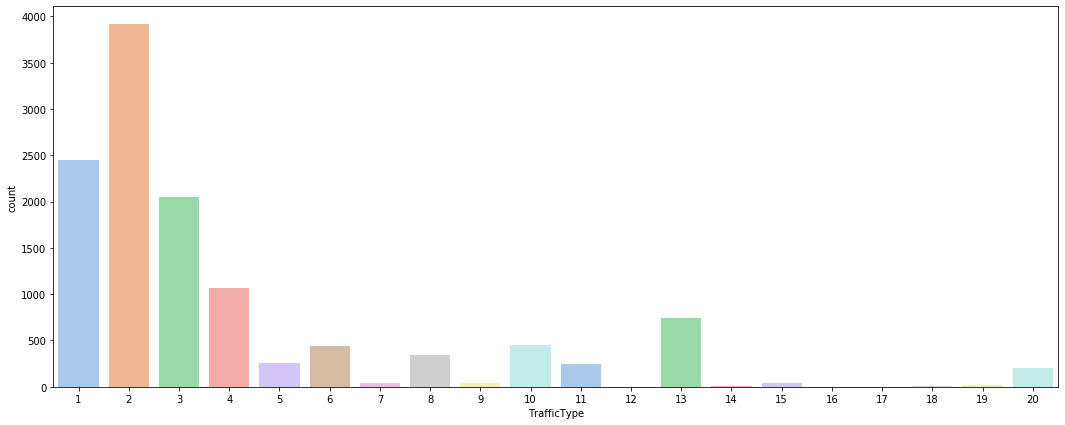

In [29]:
plt.figure(figsize = (18,7))
sns.countplot(df['TrafficType'], palette = 'pastel')
plt.show()

In [30]:
print(df['Month'].value_counts())
print(df['VisitorType'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


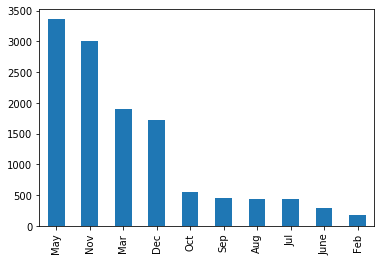

In [31]:
# Month
df['Month'].value_counts().plot(kind = "bar")

# By Sns
#sns.countplot(x = "Month", data = df)
plt.xticks(rotation = 90)
plt.show()

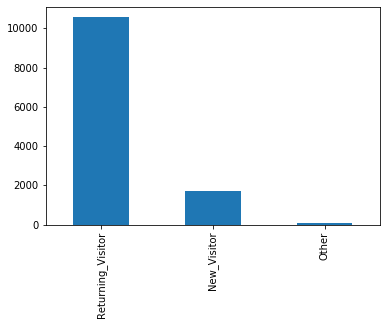

In [27]:
# VisitoType
df['VisitorType'].value_counts().plot(kind = "bar")

# By Sns
#sns.countplot(x = "Month", data = df)
plt.xticks(rotation = 90)
plt.show()

__Checking the Distribution of customers on Revenue__

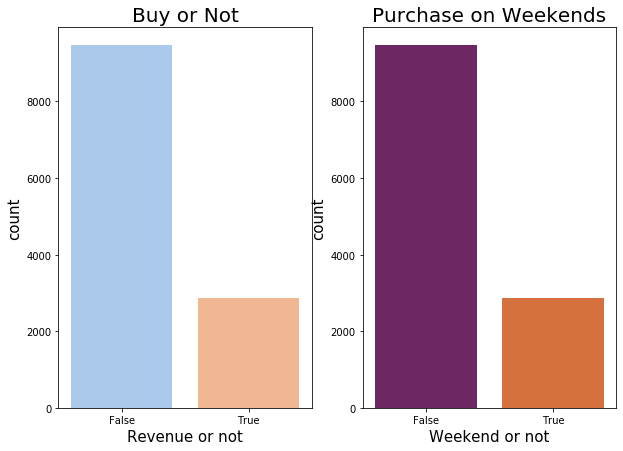

In [32]:

plt.figure(figsize = (10,7))

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

### *Bi-Variate Analysis*

__Informational Duration vs revenue__

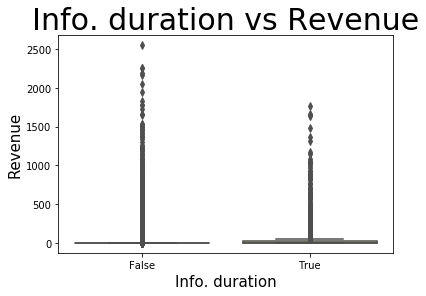

In [30]:
# Cat Vs Num
#plt.figure(figsize = (25,18))

sns.boxplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

__Administrative Duration vs revenue__

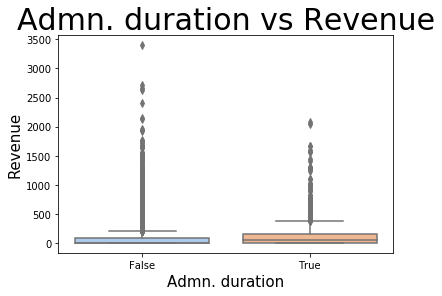

In [33]:
# Cat Vs Num
#plt.figure(figsize = (25,18))
sns.boxplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

__Product related duration vs revenue__

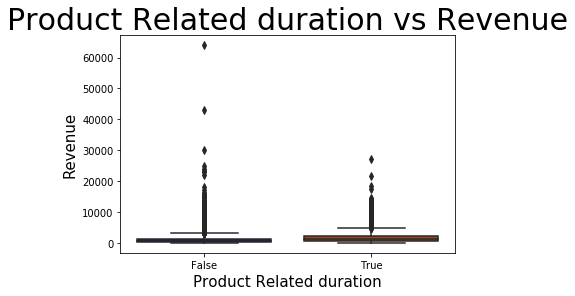

In [34]:
# Cat Vs Num
#plt.figure(figsize = (25,18))
sns.boxplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

__exit rate vs revenue__

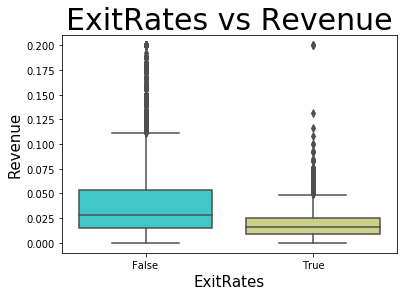

In [35]:

# Cat Vs Num
#plt.figure(figsize = (25,18))
sns.boxplot(df['Revenue'], df['ExitRates'], palette = 'rainbow')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

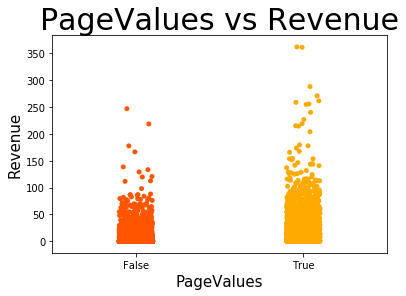

In [39]:
# Cat Vs Num
# page values vs revenue
#plt.figure(figsize = (15,9))
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

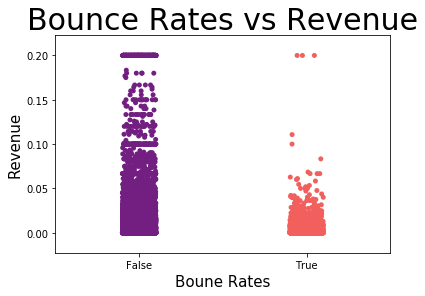

In [40]:
# Cat Vs Num
# bounce rates vs revenue

#plt.figure(figsize = (15,9))
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

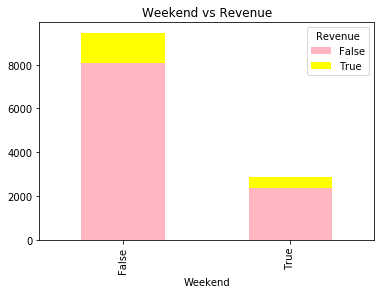

In [41]:
# Cat Vs Cat

# weekend vs Revenue
data = pd.crosstab(df['Weekend'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, color  = ['lightpink', 'yellow'])
plt.title('Weekend vs Revenue')
plt.show()

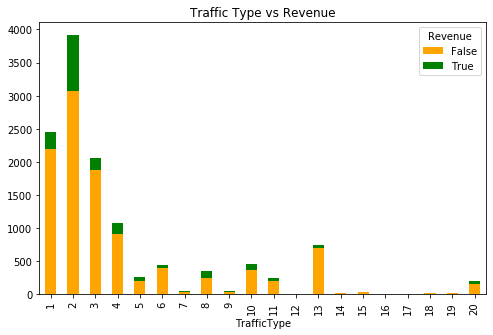

In [42]:
# Cat vs Cat
# Traffic Type vs Revenue
data = pd.crosstab(df['TrafficType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['orange', 'green'])
plt.title('Traffic Type vs Revenue')
plt.show()

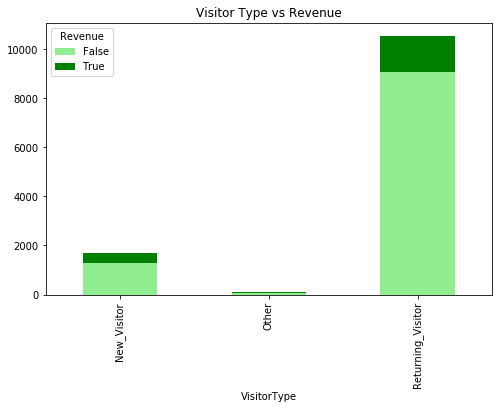

In [43]:
# Cat vs Cat
# visitor type vs revenue
data = pd.crosstab(df['VisitorType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue')
plt.show()

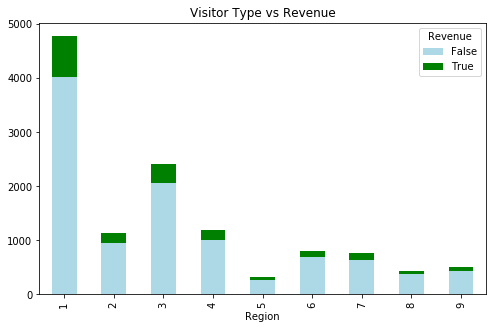

In [44]:
# Cat vs Cat
# Region vs revenue
data = pd.crosstab(df['Region'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'green'])
plt.title('Visitor Type vs Revenue')
plt.show()

In [45]:
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Browser']=df['Browser'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
df['SpecialDay']=df['SpecialDay'].astype(object)
df['Administrative']=df['Administrative'].astype(object)
df['Informational']=df['Informational'].astype(object)
df['ProductRelated']=df['ProductRelated'].astype(object)

### Muti-Variate Analysis

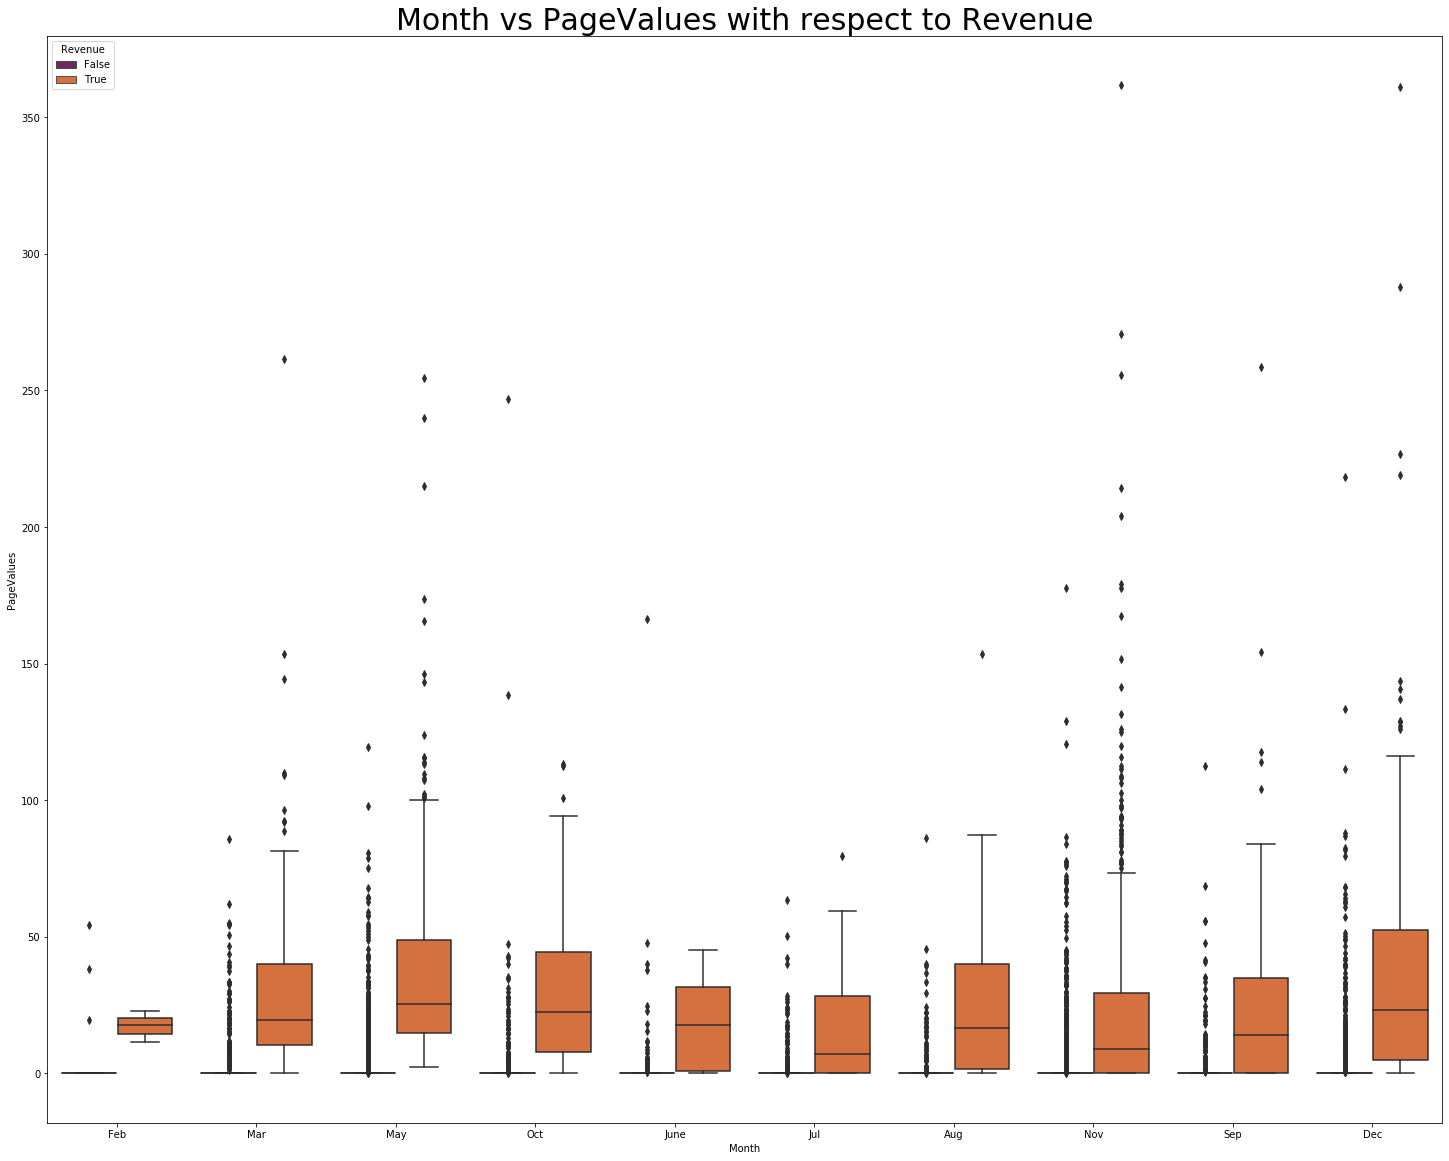

In [46]:
# month vs pagevalues with respect to revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Month vs PageValues with respect to Revenue', fontsize = 30)
plt.show()

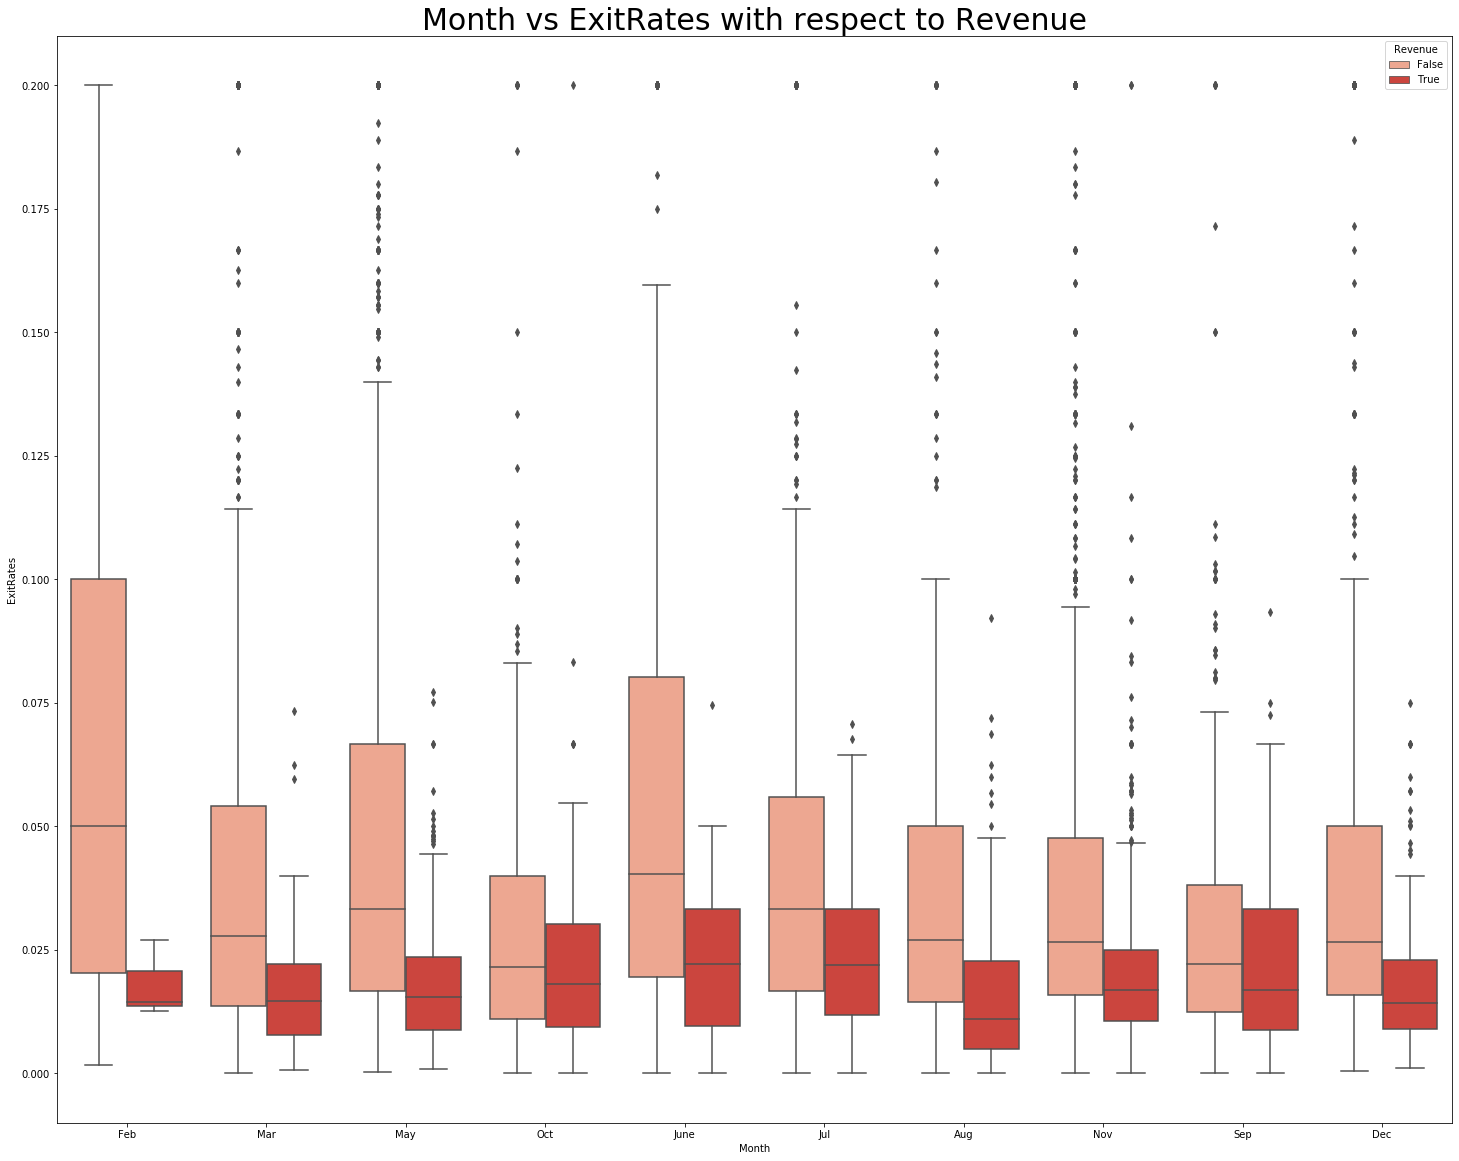

In [47]:
# month vs exitrates with respect to revenue
plt.figure(figsize = (25,20))
#plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Month vs ExitRates with respect to Revenue', fontsize = 30)
plt.show()

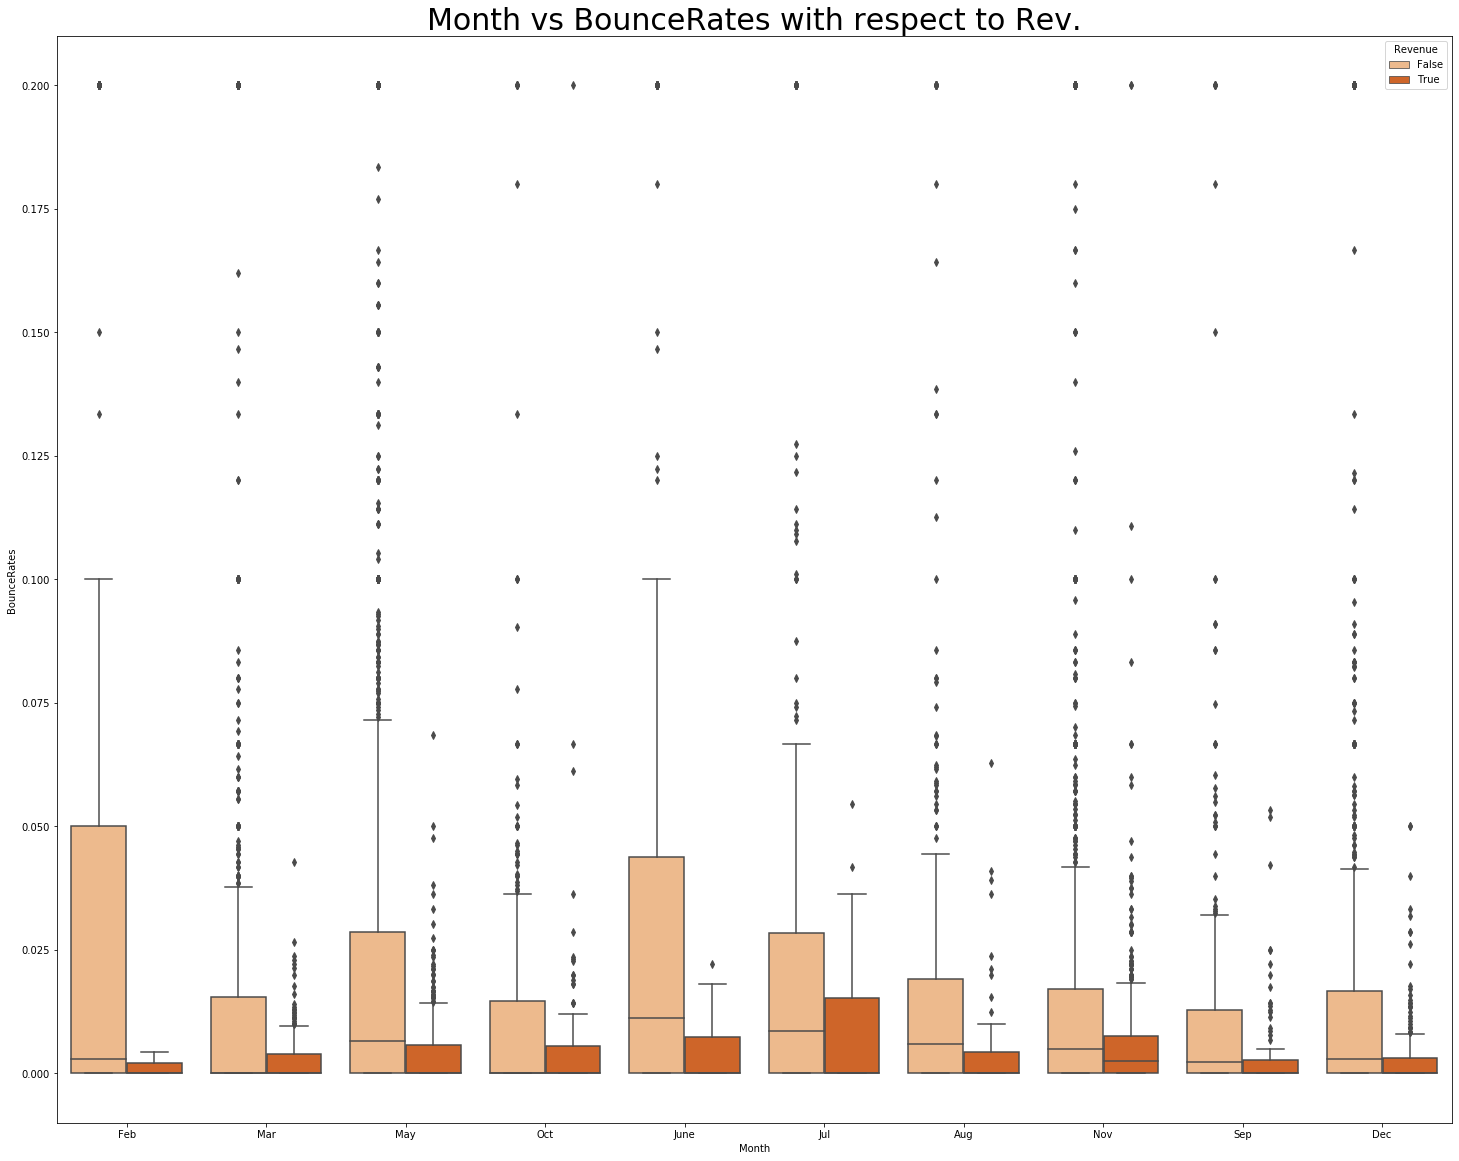

In [48]:
# month vs bouncerates with respect to revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Month vs BounceRates with respect to Rev.', fontsize = 30)
plt.show()

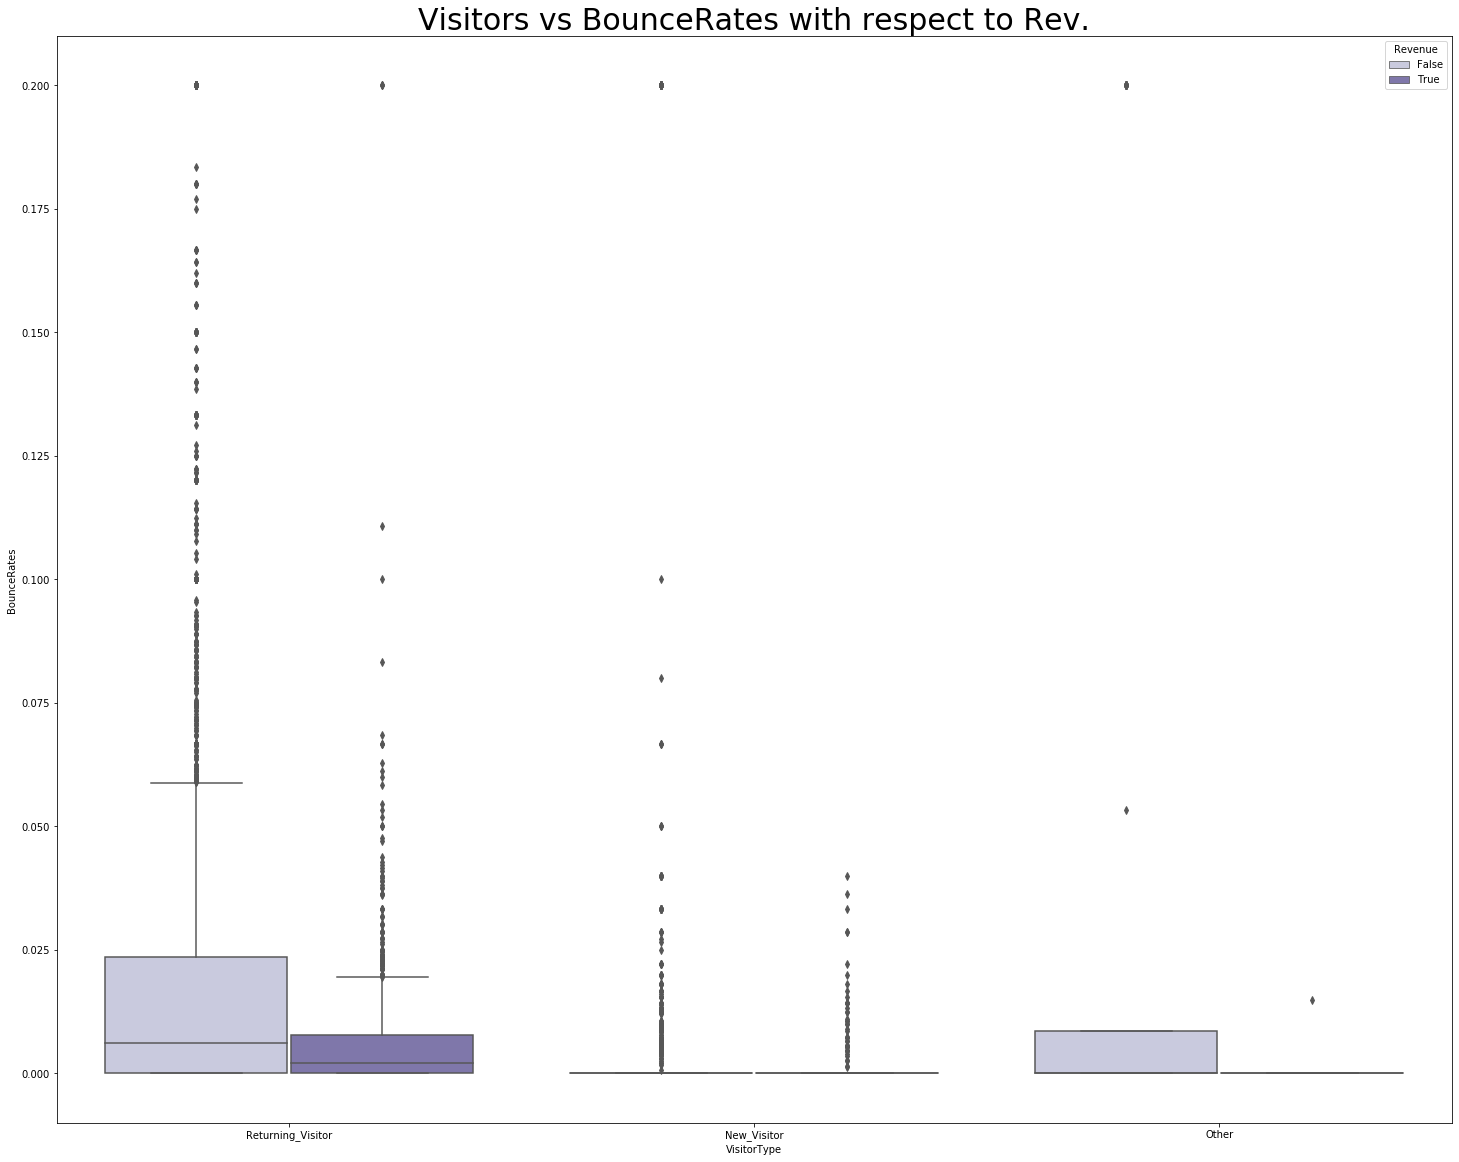

In [49]:
# VisitorType vs Bouncerates with respect to revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates with respect to Rev.', fontsize = 30)
plt.show()

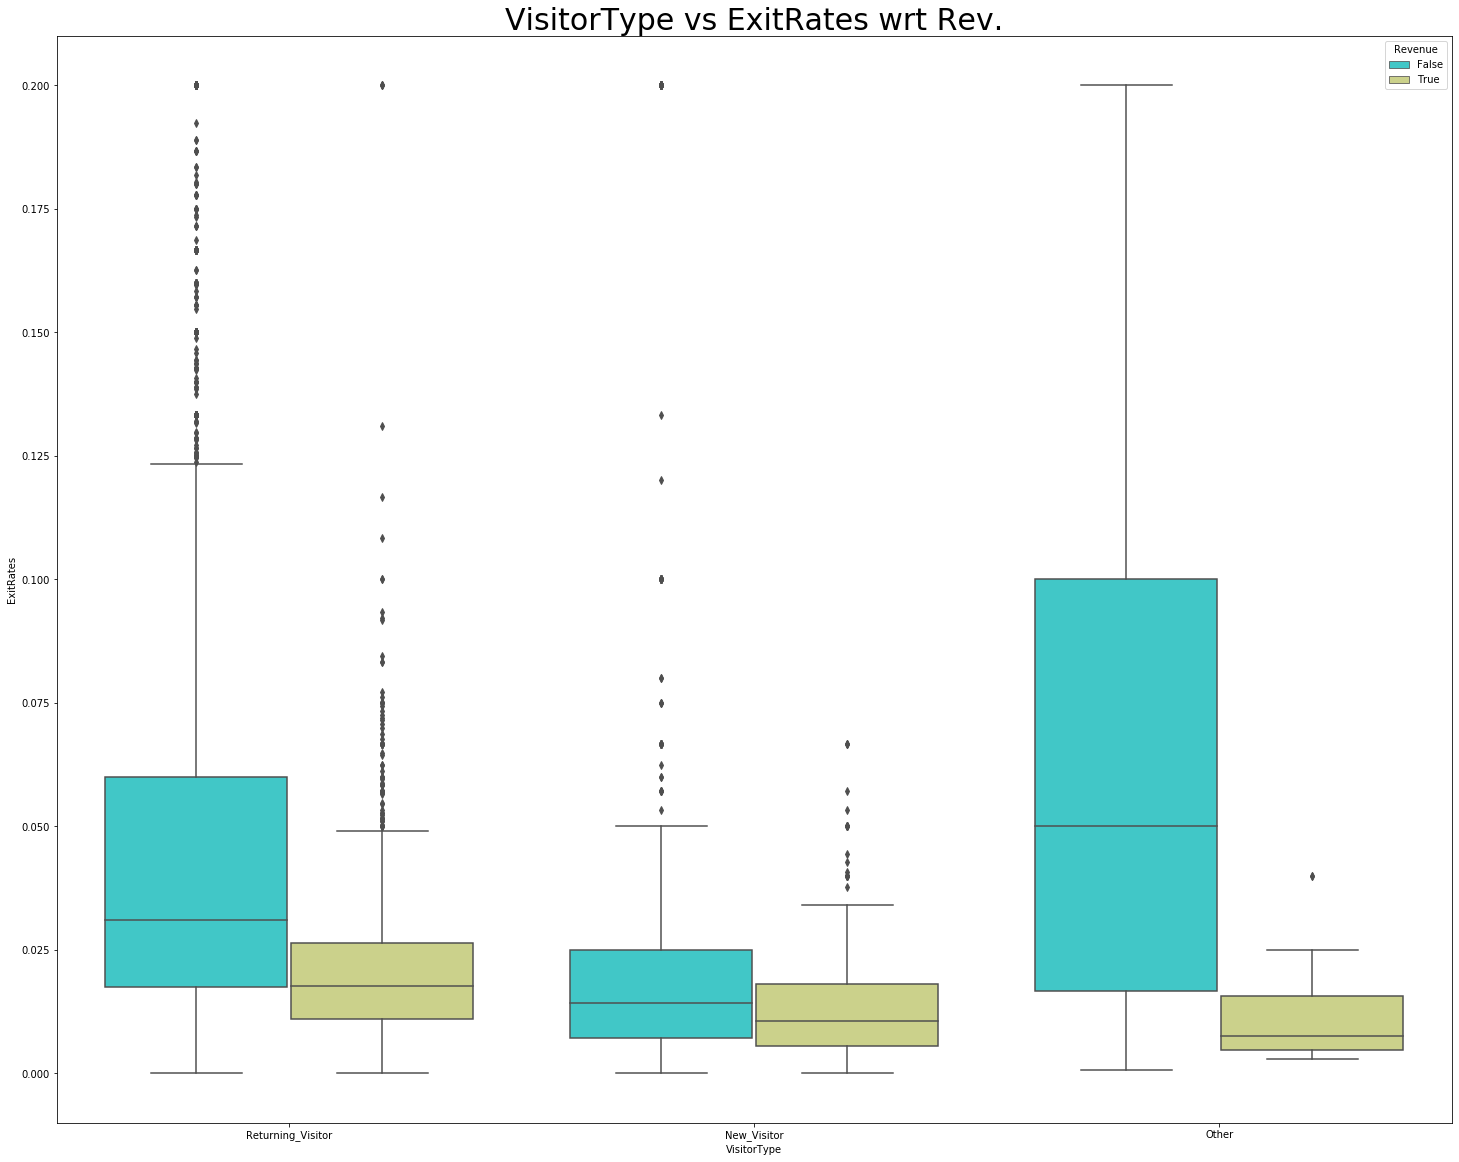

In [50]:
# visitor type vs exit rates w.r.t revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'rainbow')
plt.title('VisitorType vs ExitRates wrt Rev.', fontsize = 30)
plt.show()

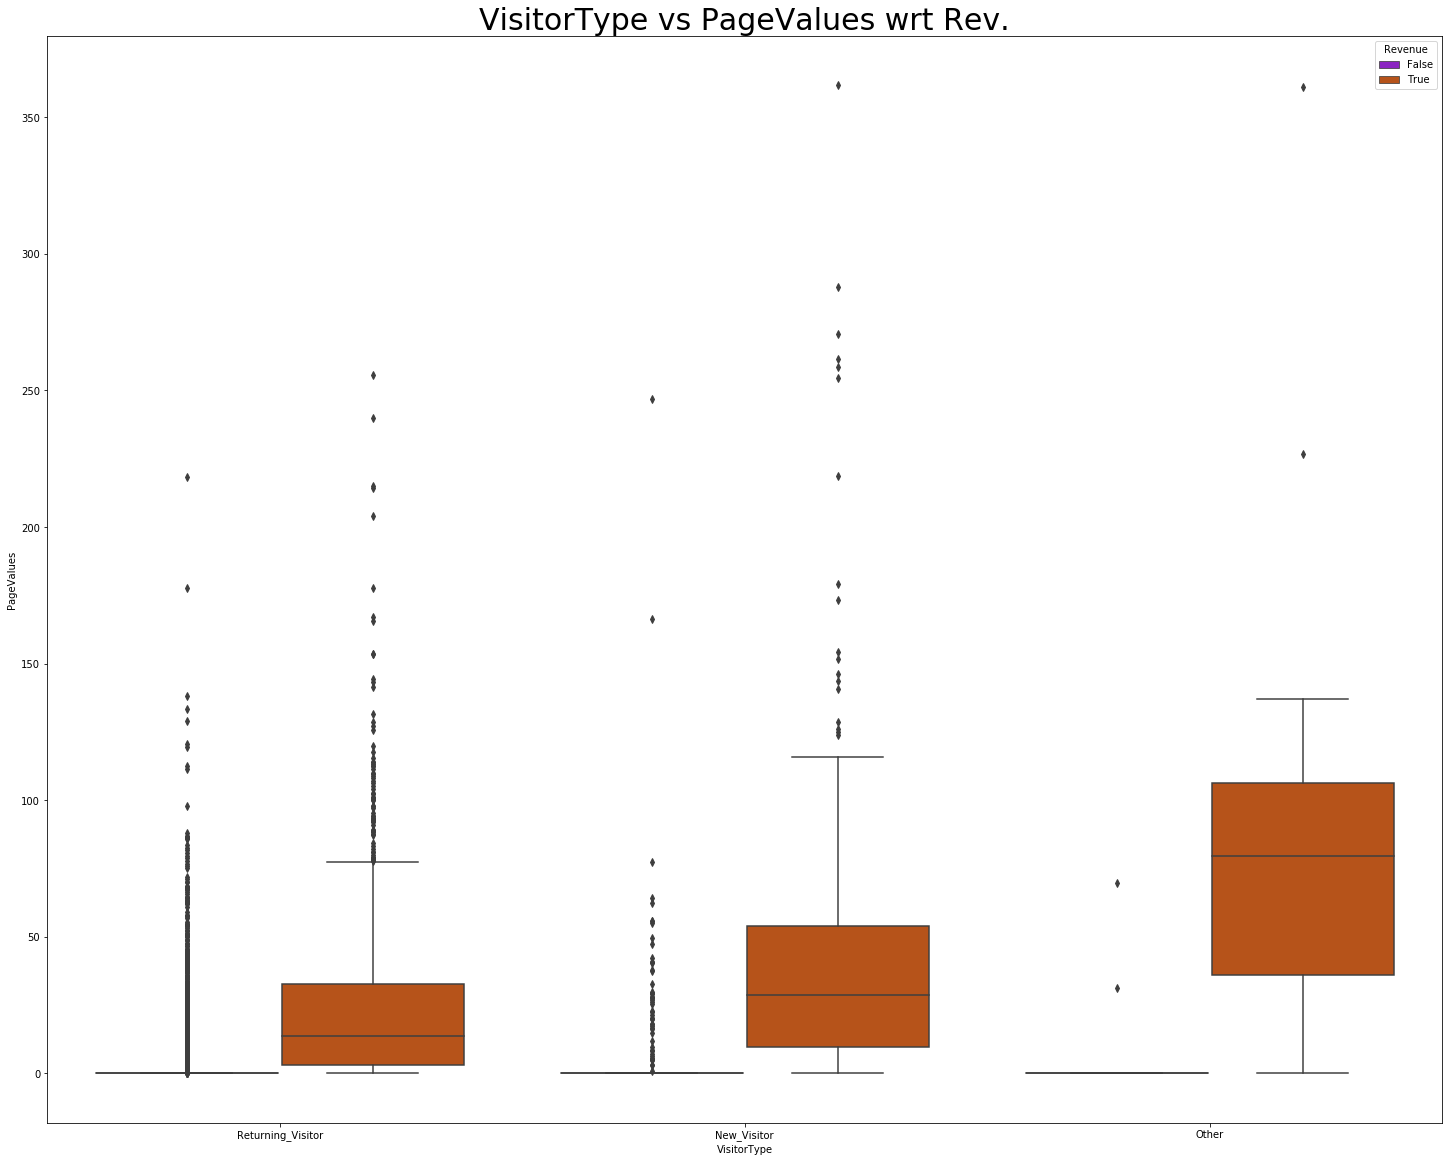

In [51]:
# visitor type vs exit rates w.r.t revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'gnuplot')
plt.title('VisitorType vs PageValues wrt Rev.', fontsize = 30)
plt.show()

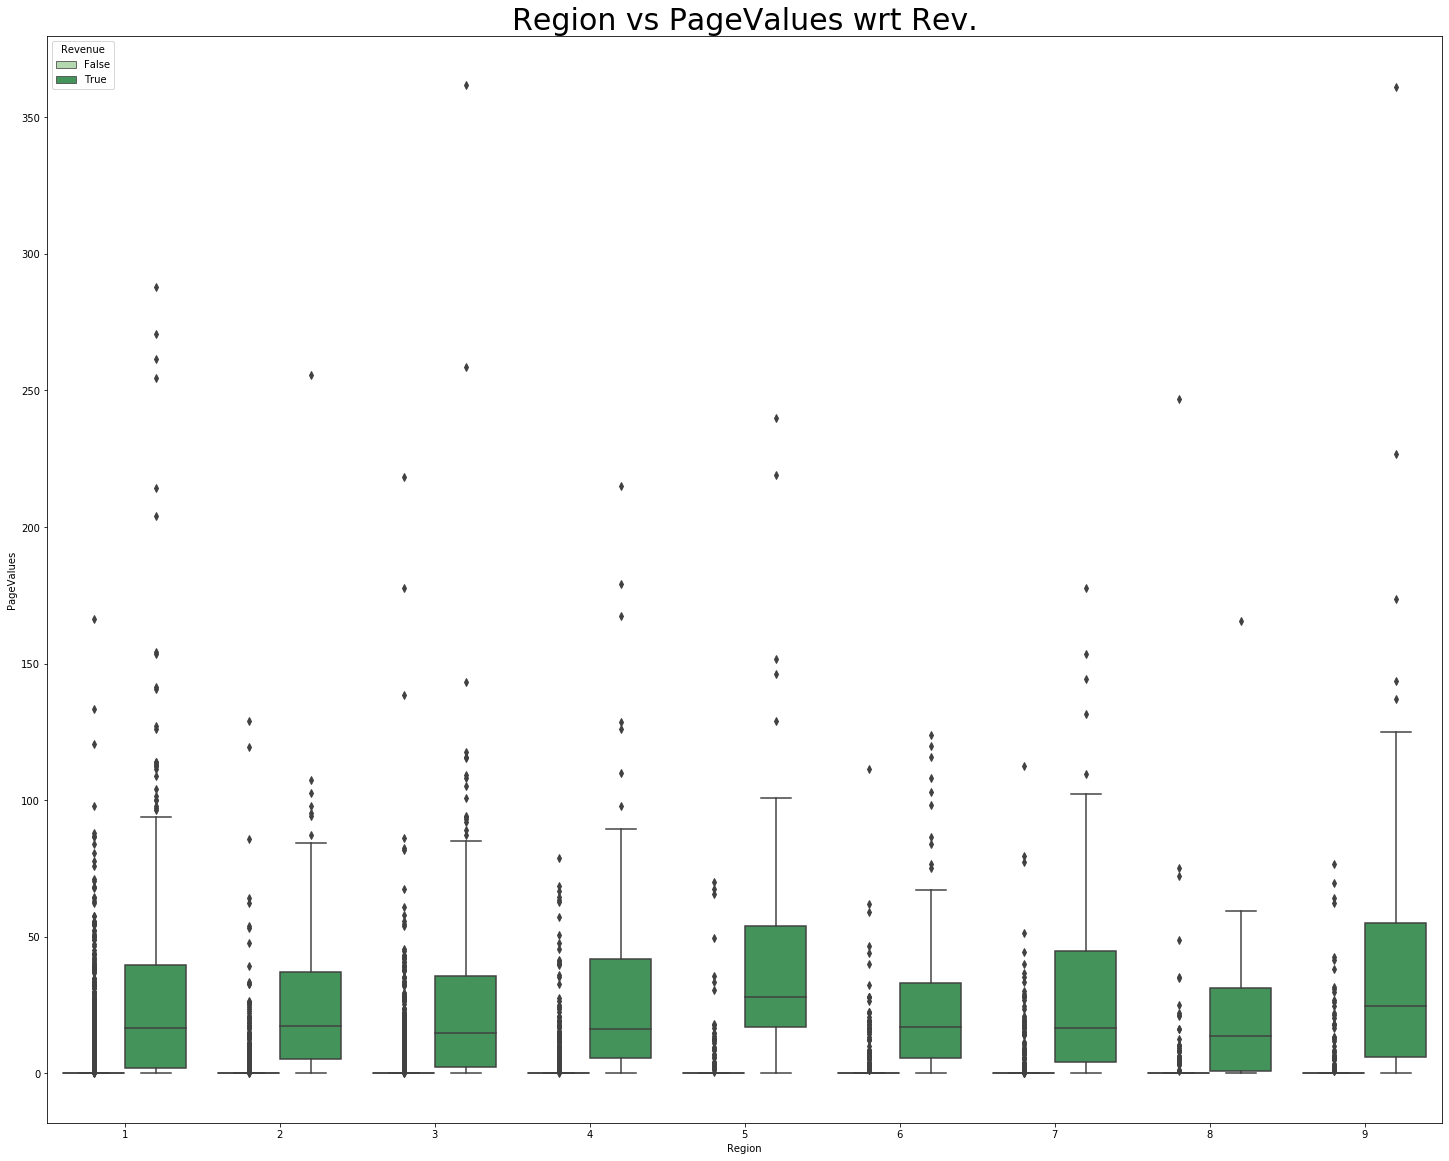

In [52]:
# region vs pagevalues w.r.t. revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)
plt.show()

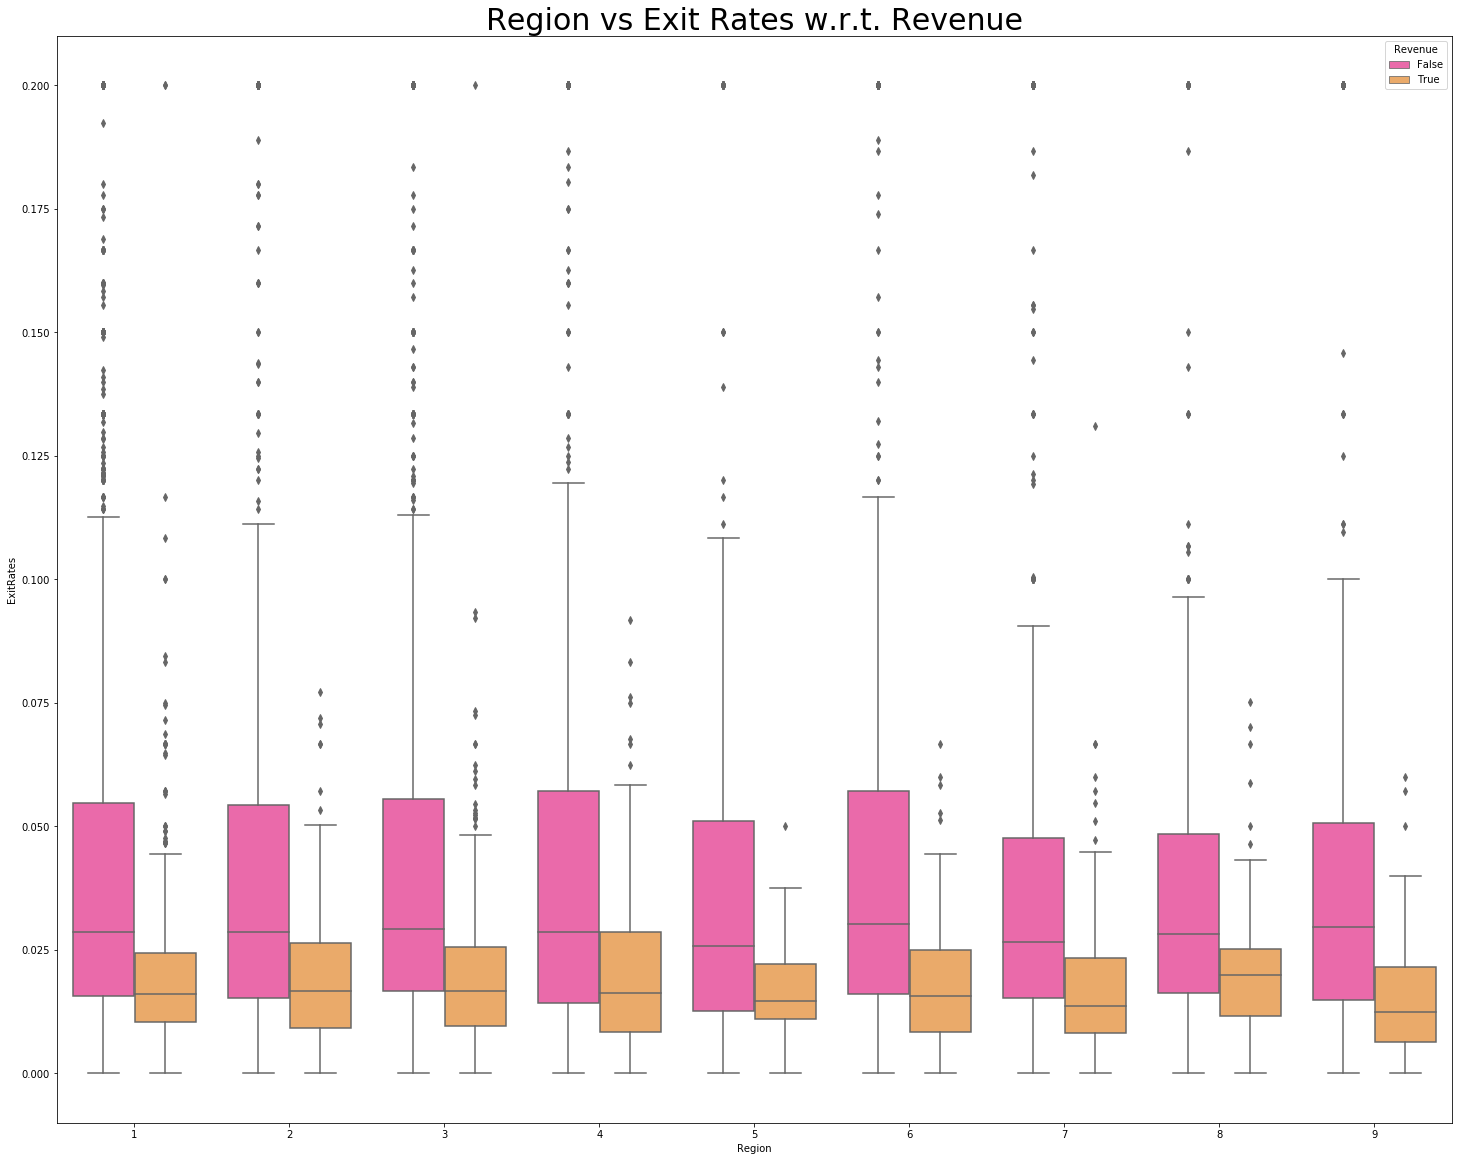

In [53]:
#region vs exit rates w.r.t. revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)
plt.show()

### Chi-Square

 __To determine whether there is a statistically significance of Various Fetaures we use Chi-Square Test__

#### Weekend

In [54]:
df_w = df[['Weekend','Revenue']]
df_w.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [55]:
df_w1 = pd.get_dummies(df_w)

In [56]:
df_w1.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [57]:
df_w1.Weekend = df_w1.Weekend.map({False : 0, True : 1})

In [58]:
df_w1.Revenue = df_w1.Revenue.map({False : 0, True :1})

In [59]:
df_w1.head()

,Weekend,Revenue
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [60]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [61]:
ct=pd.crosstab(df_w.Weekend, df_w.Revenue)
ct

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


In [62]:
nn=np.array(ct)
nn

array([[8053, 1409],
       [2369,  499]], dtype=int64)

# HYPOTHESIS

HO: The variables are independent.

HA: The variables are dependent.

In [63]:
stat, p, dof, expected = chi2_contingency(nn)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print(' Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail)')

dof=1
[[7997.80729927 1464.19270073]
 [2424.19270073  443.80729927]]
probability=0.950, critical=3.841, stat=10.391
 Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


In [64]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# Visitor Type

In [65]:
df_vt = pd.crosstab(df.VisitorType, df.Revenue)
df_vt

Revenue,False,True
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


In [66]:
vt = np.array(df_vt)
vt

array([[1272,  422],
       [  69,   16],
       [9081, 1470]], dtype=int64)

In [67]:
stat, p, dof, expected = chi2_contingency(vt)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[1431.86277372  262.13722628]
 [  71.84671533   13.15328467]
 [8918.29051095 1632.70948905]]
probability=0.950, critical=5.991, stat=135.252
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Traffic Type

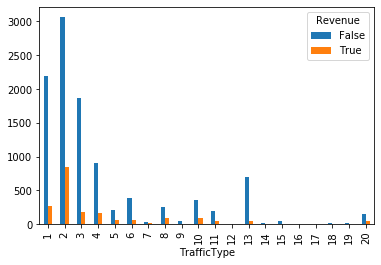

In [68]:
df_tt = pd.crosstab(df.TrafficType, df.Revenue)
df_tt.plot(kind = 'bar')

In [69]:
df_tt.TrafficType = df.TrafficType.replace(to_replace = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], value = 5)

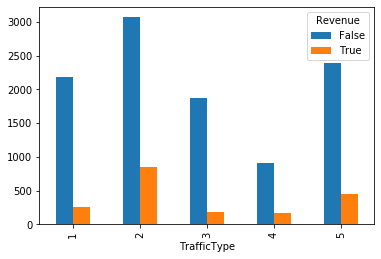

In [70]:
df_tt = pd.crosstab(df_tt.TrafficType, df.Revenue)
df_tt.plot(kind = 'bar')

In [71]:
df.TrafficType.nunique()

20

In [74]:
tt = np.array(df_tt)
tt

array([[2189,  262],
       [3066,  847],
       [1872,  180],
       [ 904,  165],
       [2391,  454]], dtype=int64)

In [75]:
stat, p, dof, expected = chi2_contingency(tt)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[2071.72116788  379.27883212]
 [3307.48467153  605.51532847]
 [1734.46423358  317.53576642]
 [ 903.57810219  165.42189781]
 [2404.75182482  440.24817518]]
probability=0.950, critical=9.488, stat=227.828
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Region

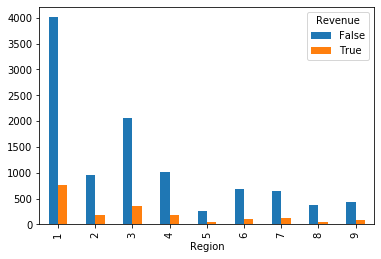

In [76]:
df_r = pd.crosstab(df.Region, df.Revenue)
df_r.plot(kind = 'bar')
plt.show()

In [77]:
df_r

Revenue,False,True
Region,,
1,4009,771
2,948,188
3,2054,349
4,1007,175
5,266,52
6,693,112
7,642,119
8,378,56
9,425,86


In [78]:
df_r.iloc[5,:]

Revenue
False    693
True     112
Name: 6, dtype: int64

In [79]:
df_r.Region = df.Region.replace(to_replace = [5,6,7,8,9], value = 5)

In [80]:
print(df.Region.nunique())
print(df_r.Region.unique())

9
[1 5 2 3 4]


In [81]:
df_r.Region.unique()

array([1, 5, 2, 3, 4], dtype=int64)

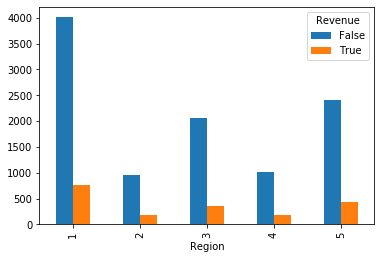

In [82]:
df_r = pd.crosstab(df_r.Region, df.Revenue)
df_r.plot(kind = 'bar')
plt.show()

In [83]:
rg = np.array(df_r)
rg

array([[4009,  771],
       [ 948,  188],
       [2054,  349],
       [1007,  175],
       [2404,  425]], dtype=int64)

In [84]:
stat, p, dof, expected = chi2_contingency(rg)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[4040.32116788  739.67883212]
 [ 960.21021898  175.78978102]
 [2031.14890511  371.85109489]
 [ 999.0919708   182.9080292 ]
 [2391.22773723  437.77226277]]
probability=0.950, critical=9.488, stat=5.079
Independent (fail to reject H0)
significance=0.050, p=0.279
Independent (fail to reject H0)


### Browser


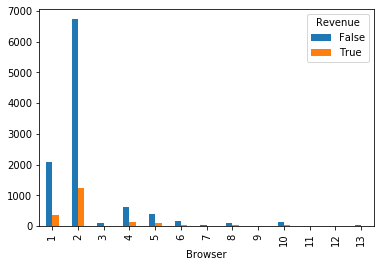

In [85]:
df_b = pd.crosstab(df.Browser, df.Revenue)
df_b.plot(kind = 'bar')
plt.show()

In [86]:
df_b.Browser = df.Browser.replace(to_replace = [3,4,5,6,7,8,9,10,11,12,13], value = 3)

In [87]:
print(df.Browser.nunique())
print(df_b.Browser.unique())

13
[1 2 3]


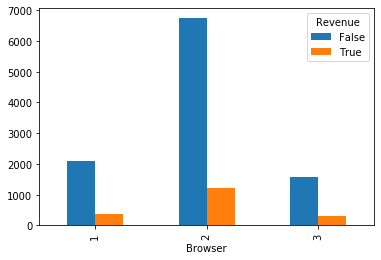

In [88]:
df_b = pd.crosstab(df_b.Browser, df.Revenue)
df_b.plot(kind = 'bar')

In [89]:
b = np.array(df_b)
b

array([[2097,  365],
       [6738, 1223],
       [1587,  320]], dtype=int64)

In [90]:
stat, p, dof, expected = chi2_contingency(b)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[2081.0189781   380.9810219 ]
 [6729.07883212 1231.92116788]
 [1611.90218978  295.09781022]]
probability=0.950, critical=5.991, stat=3.356
Independent (fail to reject H0)
significance=0.050, p=0.187
Independent (fail to reject H0)


### OperatingSystems

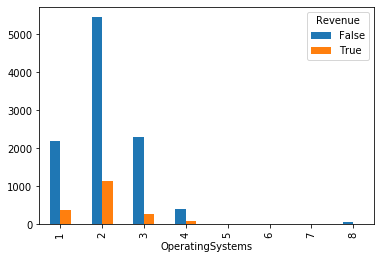

In [91]:
df_os = pd.crosstab(df.OperatingSystems, df.Revenue)
df_os.plot(kind = 'bar')
plt.show()

In [92]:
df_os

Revenue,False,True
OperatingSystems,,
1,2206,379
2,5446,1155
3,2287,268
4,393,85
5,5,1
6,17,2
7,6,1
8,62,17


In [93]:
df_os.OperatingSystems = df.OperatingSystems.replace(to_replace = [4,5,6,7,8], value =4)

In [94]:
df_os = pd.crosstab(df_os.OperatingSystems, df.Revenue)
df_os

Revenue,False,True
OperatingSystems,,
1,2206,379
2,5446,1155
3,2287,268
4,483,106


In [95]:
os = np.array(df_os)
os

array([[2206,  379],
       [5446, 1155],
       [2287,  268],
       [ 483,  106]], dtype=int64)

In [96]:
stat, p, dof, expected = chi2_contingency(os)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
[[2184.98540146  400.01459854]
 [5579.53138686 1021.46861314]
 [2159.62773723  395.37226277]
 [ 497.85547445   91.14452555]]
probability=0.950, critical=7.815, stat=73.368
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Month

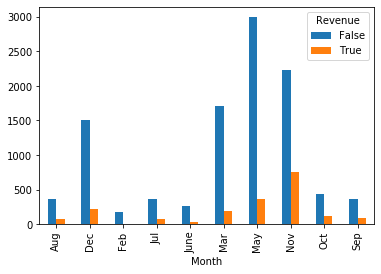

In [97]:
df_m = pd.crosstab(df.Month, df.Revenue)
df_m.plot(kind = 'bar')
plt.show()

In [98]:
df_m.Month = df.Month.replace(to_replace = ['Aug','Feb',' Jul','June','Oct', 'Sep'], value = 'Rest')

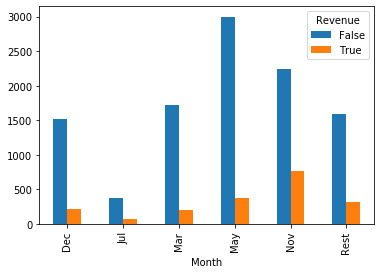

In [99]:
df_m = pd.crosstab(df_m.Month, df.Revenue)
df_m.plot(kind = 'bar')
plt.show()

In [100]:
m = np.array(df_m)
m

array([[1511,  216],
       [ 366,   66],
       [1715,  192],
       [2999,  365],
       [2238,  760],
       [1593,  309]], dtype=int64)

In [101]:
stat, p, dof, expected = chi2_contingency(m)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[1459.75620438  267.24379562]
 [ 365.15036496   66.84963504]
 [1611.90218978  295.09781022]
 [2843.43941606  520.56058394]
 [2534.07591241  463.92408759]
 [1607.67591241  294.32408759]]
probability=0.950, critical=11.070, stat=333.662
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Special Day

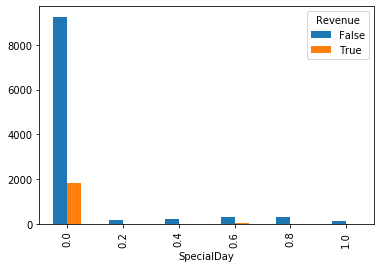

In [102]:
df_sd = pd.crosstab(df.SpecialDay, df.Revenue)
df_sd.plot(kind = 'bar')
plt.show()

In [103]:
df_sd.SpecialDay = df.SpecialDay.replace(to_replace = [0.2,0.4,0.6,0.8,1.0], value = 1.0)

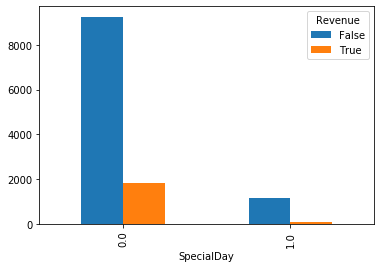

In [104]:
df_sd = pd.crosstab(df_sd.SpecialDay, df.Revenue)
df_sd.plot(kind = 'bar')
plt.show()

In [105]:
sd = np.array(df_sd)
sd

array([[9248, 1831],
       [1174,   77]], dtype=int64)

In [106]:
stat, p, dof, expected = chi2_contingency(sd)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[9364.58540146 1714.41459854]
 [1057.41459854  193.58540146]]
probability=0.950, critical=3.841, stat=91.655
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


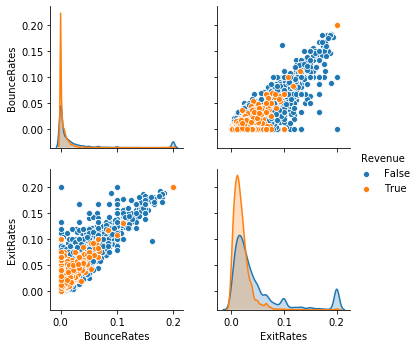

In [113]:
sns.pairplot(df,x_vars=['BounceRates','ExitRates'],y_vars=['BounceRates','ExitRates'],hue='Revenue',diag_kind='kde')
plt.show()

In [114]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

__Outlier Treatment__

In [115]:
# For Administrative_Duaration
q1_adm=np.quantile(df.Administrative_Duration,0.25)
q3_adm=np.quantile(df.Administrative_Duration,0.75)
iqr_adm=q3_adm-q1_adm
ll=q1_adm-(1.5*iqr_adm)
ul=q3_adm+(1.5*iqr_adm)
df_ad_out=df[(df.Administrative_Duration<ll) | (df.Administrative_Duration>ul)]
df_ad_out.shape

(1172, 18)

In [116]:
# for Informational_Duration
q1_inf=np.quantile(df.Informational_Duration,0.25)
q3_inf=np.quantile(df.Informational_Duration,0.75)
iqr_inf=q3_inf-q1_inf
ll=q1_inf-(1.5*iqr_inf)
ul=q3_inf+(1.5*iqr_inf)
df_inf_out=df[(df.Informational_Duration<ll) | (df.Informational_Duration>ul)]
df_inf_out.shape

(2405, 18)

In [117]:
# for Product Related Duaration
q1_pro=np.quantile(df.ProductRelated_Duration,0.25)
q3_pro=np.quantile(df.ProductRelated_Duration,0.75)
iqr_pro=q3_pro-q1_pro
ll=q1_pro-(1.5*iqr_pro)
ul=q3_pro+(1.5*iqr_pro)
df_pro_out=df[(df.ProductRelated_Duration<ll) | (df.ProductRelated_Duration>ul)]
df_pro_out.shape

(961, 18)

In [119]:
# For Bounce Rate
q1_bou=np.quantile(df.BounceRates,0.25)
q3_bou=np.quantile(df.BounceRates,0.75)
iqr_bou=q3_bou-q1_bou
ll=q1_bou-(1.5*iqr_bou)
ul=q3_bou+(1.5*iqr_bou)
df_bou_out=df[(df.BounceRates<ll) | (df.BounceRates>ul)]
df_bou_out.shape

(1551, 18)

In [123]:
# for Exit Rate
q1_ex=np.quantile(df.ExitRates,0.25)
q3_ex=np.quantile(df.ExitRates,0.75)
iqr_ex=q3_ex-q1_ex
ll=q1_ex-(1.5*iqr_ex)
ul=q3_ex+(1.5*iqr_ex)
df_ex_out=df[(df.ExitRates<ll) | (df.ExitRates>ul)]
df_ex_out.shape

(1099, 18)

In [124]:
# for Page Values
q1_pg=np.quantile(df.PageValues,0.25)
q3_pg=np.quantile(df.PageValues,0.75)
iqr_pg=q3_pg-q1_pg
ll=q1_pg-(1.5*iqr_pg)
ul=q3_pg+(1.5*iqr_pg)
df_pg_out=df[(df.PageValues<ll) | (df.PageValues>ul)]
df_pg_out.shape

(2730, 18)

In [125]:
dff=pd.DataFrame()

In [126]:
dff['Administrative_Duration']=df.index.isin(df_ad_out.index)
dff['Informational_Duration']=df.index.isin(df_inf_out.index)
dff['ProductRelated_Duration']=df.index.isin(df_pro_out.index)
dff['BounceRates']=df.index.isin(df_bou_out.index)
dff['ExitRates']=df.index.isin(df_ex_out.index)
dff['PageValues']=df.index.isin(df_pg_out.index)

In [127]:
# Plotting heat map for Otliers

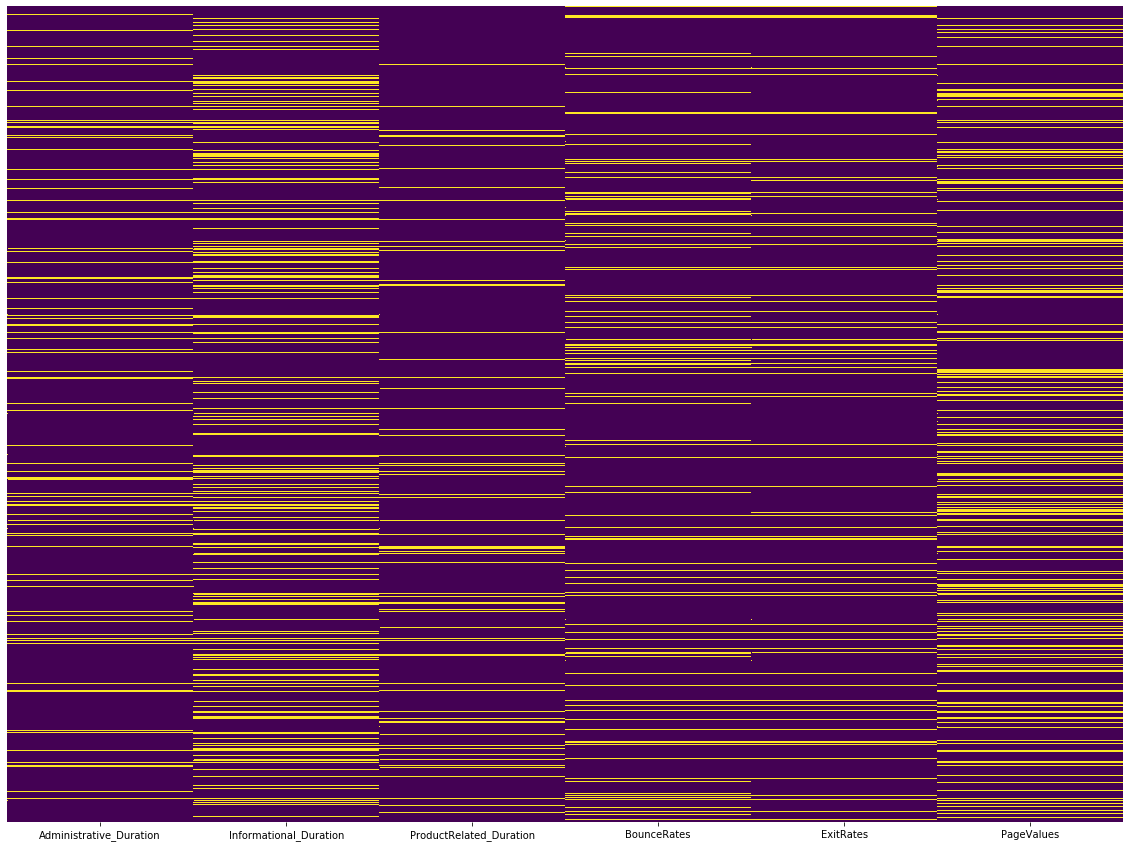

In [128]:
plt.figure(figsize=(20,15))
sns.heatmap(dff , yticklabels = False , cbar = False , cmap = 'viridis')
plt.show()

___Above Heatmap is For Variables Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, PageValues. Inwhich Yellow lines Represents the presence of Outliers...___

In [129]:
# Converting Booleans into 1's and 0's
bool_map={True:1,False:0}
df.Weekend.replace(bool_map,inplace=True)
df.Revenue.replace(bool_map,inplace=True)

In [130]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,Feb,3,3,1,4,Returning_Visitor,1,0


In [131]:
dff.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,False,False,False,True,True,False
1,False,False,False,False,False,False
2,False,False,False,True,True,False
3,False,False,False,True,True,False
4,False,False,False,False,False,False


In [132]:
dff['multi'] = ['Y' if x >= 4 else 'N' for x in np.sum(dff.values == True, 1)]

In [133]:
dff['multi'] = ['Y' if x >= 4 else 'N' for x in np.sum(dff.values == True, 1)]

In [134]:
df_new=df[dff['multi']=='N']
df_new.shape

(12200, 18)

In [135]:
# Converting Booleans into 1's and 0's
bool_map={True:1,False:0}
df_new.Weekend.replace(bool_map,inplace=True)
df_new.Revenue.replace(bool_map,inplace=True)
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,Feb,3,3,1,4,Returning_Visitor,1,0


In [136]:
# Replacing the Outliers with NAN
df_new.loc[(dff['Administrative_Duration']==True),'Administrative_Duration']=np.NAN
df_new.loc[(dff['Informational_Duration']==True),'Informational_Duration']=np.NAN
df_new.loc[(dff['ProductRelated_Duration']==True),'ProductRelated_Duration']=np.NAN
df_new.loc[(dff['BounceRates']==True),'BounceRates']=np.NAN
df_new.loc[(dff['PageValues']==True),'PageValues']=np.NAN
#df_new=df_new.drop('ExitRates',axis=1)

In [137]:
df_new.isnull().sum()[df_new.isnull().sum()>0]

Administrative_Duration    1042
Informational_Duration     2275
ProductRelated_Duration     832
BounceRates                1549
PageValues                 2600
dtype: int64

In [138]:
imp_col=df_new.isnull().sum()[df_new.isnull().sum()>0].index

In [139]:
# Creating dummy Variables
df_dum=pd.get_dummies(df_new)
df_dum.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,Revenue,Administrative_0,Administrative_1,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.000000,NaN,0.20,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,64.000000,0.00,0.10,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.000000,NaN,0.20,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,2.666667,NaN,0.14,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,627.500000,0.02,0.05,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


__After Converting the Outliers into NAN, we need to assign values to this null/missing Values. 
Here we are using MICE(Missing Imputaions through Chained Equations) technique for imputing the missing values.__

In [140]:
from impyute.imputation.cs import mice

In [141]:
imputed_df=mice(df_dum.values)

In [142]:
imputed_df=pd.DataFrame(imputed_df,columns=df_dum.columns)

In [143]:
imputed_df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,Revenue,Administrative_0,Administrative_1,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.000000,0.034648,0.20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,64.000000,0.000000,0.10,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.000000,0.030242,0.20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2.666667,0.020329,0.14,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,627.500000,0.020000,0.05,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [144]:
for c in imp_col:
    imputed_df[c]=imputed_df[c].round(2)
imputed_df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,Revenue,Administrative_0,Administrative_1,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.00,0.03,0.20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,64.00,0.00,0.10,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.00,0.03,0.20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2.67,0.02,0.14,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,627.50,0.02,0.05,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [145]:
X=imputed_df.drop(['Revenue','ExitRates'],axis=1)
Y=imputed_df.Revenue
#Y.value_counts(normalize=True)

In [146]:
from sklearn.metrics import f1_score,cohen_kappa_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

__Spliting the data into Train and test__

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

__Our Target Variable is Imbalanced 
First we train model without bakacing the target vairble
and__ 

__Later we will train the model using Oversampling technique SMOTE (Synthetic Minority Over-sampling Technique) From imblearn library__

### Without SMOTE

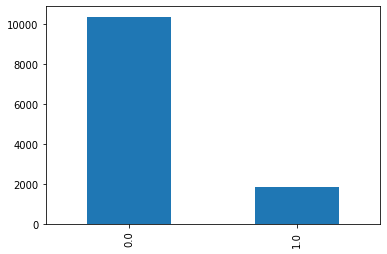

In [148]:
imputed_df['Revenue'].value_counts().plot(kind='bar')
plt.show()

## Logistic Regression


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
log=LogisticRegression(C=0.005994,penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))
#log.C_

Train score: 0.848711943793911
Test score: 0.8478142076502733


In [150]:
log_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_pred))
print('Classification report:\n',classification_report(y_test,log_pred))

F1 Score: 0.0
Kappa Score: -0.0005457647282856026
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      3104
         1.0       0.00      0.00      0.00       556

    accuracy                           0.85      3660
   macro avg       0.42      0.50      0.46      3660
weighted avg       0.72      0.85      0.78      3660



In [151]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [152]:
fpr,tpr,thresh=roc_curve(y_test,log_pred)
auc_log=auc(fpr,tpr)

### Decision Tree

In [153]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.8565573770491803
Test score: 0.8442622950819673


In [154]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))
print('Classification report:\n',classification_report(y_test,dt_pred))

F1 Score: 0.0594059405940594
Kappa Score: 0.03522077729887718
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92      3104
         1.0       0.36      0.03      0.06       556

    accuracy                           0.84      3660
   macro avg       0.61      0.51      0.49      3660
weighted avg       0.78      0.84      0.79      3660



In [155]:
fpr_dt,tpr_dt,thresh=roc_curve(y_test,dt_pred)
auc_dt=auc(fpr,tpr)

### Random Forest

In [156]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))

Train score: 0.8485948477751757
Test score: 0.848087431693989


In [157]:
rf_sm_pred=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_sm_pred))
print('Kappa Score:',cohen_kappa_score(y_test,rf_sm_pred))
print('Classification report:\n',classification_report(y_test,rf_sm_pred))

F1 Score: 0.0
Kappa Score: 0.0
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      3104
         1.0       0.00      0.00      0.00       556

    accuracy                           0.85      3660
   macro avg       0.42      0.50      0.46      3660
weighted avg       0.72      0.85      0.78      3660



In [163]:
fpr_rf,tpr_rf,thresh=roc_curve(y_test,rf_sm_pred)
auc_rf=auc(fpr,tpr)

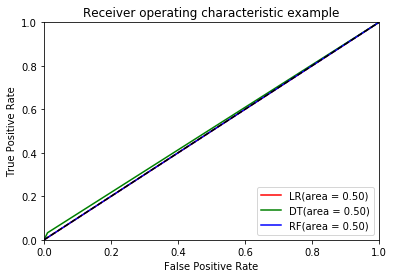

In [164]:
plt.plot(fpr,tpr, label='LR(area = %0.2f)' % auc_log,color='red')
plt.plot(fpr_dt, tpr_dt, label='DT(area = %0.2f)' % auc_dt,color='green')
plt.plot(fpr_rf, tpr_rf, label='RF(area = %0.2f)' % auc_rf,color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Navie Bayes

In [167]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print('Train score:',gnb.score(x_train,y_train))
print('Test score:',gnb.score(x_test,y_test))

Train score: 0.8427400468384075
Test score: 0.8404371584699454


In [168]:
nb_pred=gnb.predict(x_test)
fpr2,tpr2,thresh=roc_curve(y_test,nb_pred)
auc2=auc(fpr2,tpr2)

In [167]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.8392091298975067
Test score: 0.8331354926233678


In [168]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))

F1 Score: 0.821674519753534
Kappa Score: 0.6661086704691426


In [169]:
fpr3,tpr3,thresh=roc_curve(y_test,dt_pred)
auc3=auc(fpr3,tpr3)

In [170]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))

Train score: 0.8311405102856727
Test score: 0.8261828048160081


In [171]:
rf_pred_sm=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_pred_sm))

F1 Score: 0.8282794437929302
Kappa Score: 0.6524040030536151


In [172]:
fpr4,tpr4,thresh=roc_curve(y_test,rf_pred_sm)
auc4=auc(fpr4,tpr4)

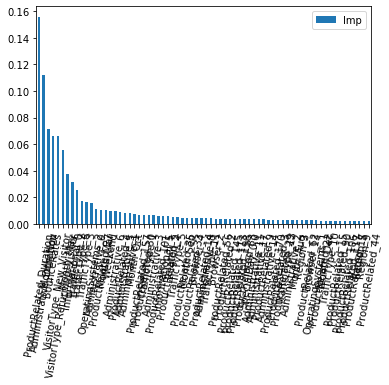

In [186]:
imp.sort_values('Imp',ascending=False).head(70).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

In [187]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_res,y_res)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.DataFrame(rf_sm.feature_importances_, index=X.columns)
feat_importances.nlargest(70).plot(kind='bar')
plt.show()
plt.figure(figsize=(20,8))
imp.sort_values('Imp',ascending=False).head(70).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

[1.83090647e-02 0.00000000e+00 2.94367618e-02 2.73800222e-02
 0.00000000e+00 2.26771908e-02 3.75667284e-02 1.84342567e-02
 8.18893968e-03 7.45797116e-03 7.30440009e-03 4.94293141e-03
 7.18415641e-03 3.45109349e-03 3.22536196e-03 3.41043842e-03
 1.66942814e-03 1.12250592e-03 9.31364429e-04 1.25694432e-03
 5.46119720e-04 3.81110935e-04 4.22531143e-04 2.52247407e-04
 5.91736593e-05 4.07658676e-05 1.35763500e-05 1.70601208e-05
 5.68872670e-06 4.35752762e-05 4.47571978e-07 2.07083046e-02
 1.26295017e-02 6.80968943e-03 4.69358476e-03 3.56196219e-03
 1.65820425e-03 7.36806275e-04 2.75874207e-04 2.00922270e-04
 2.15938375e-04 1.46449654e-04 2.14363421e-07 1.27640016e-04
 0.00000000e+00 7.80640125e-06 1.66011906e-05 6.58868201e-04
 1.08179284e-02 5.79070243e-03 4.88376183e-03 4.93178894e-03
 3.20764956e-03 4.35506298e-03 4.95460391e-03 3.66724289e-03
 3.37596559e-03 4.48115748e-03 3.74156562e-03 4.01129535e-03
 3.30730704e-03 3.70277447e-03 3.63905310e-03 2.98952541e-03
 3.21873162e-03 2.391044

TypeError: nlargest() missing 1 required positional argument: 'columns'

__As observed from findings it is clear that the performance improved with SMOTE.
Among all models Random Forest With Feature Selection gives best accuracy metrics.__

### With SMOTE

In [188]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
X_new,Y_new=smote.fit_sample(X,Y)
X_new=pd.DataFrame(X_new,columns=X.columns)
Y_new=pd.DataFrame(Y_new,columns=['Revenue'])
X_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,Weekend,Administrative_0,Administrative_1,Administrative_2,Administrative_3,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.00,0.03,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,64.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.00,0.03,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2.67,0.02,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,627.50,0.02,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


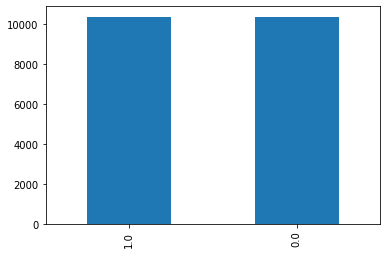

In [189]:
Y_new['Revenue'].value_counts().plot(kind='bar')
plt.show()

In [190]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=1)

### Logistic Regression

In [231]:
log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))


Train score: 0.6926368090538956
Test score: 0.6932861052970536


In [192]:
log_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_pred))
print('Classification report:\n',classification_report(y_test,log_pred))

F1 Score: 0.7225130890052357
Kappa Score: 0.4204399804801098
Classification report:
               precision    recall  f1-score   support

         0.0       0.74      0.66      0.70      3142
         1.0       0.68      0.76      0.72      3069

    accuracy                           0.71      6211
   macro avg       0.71      0.71      0.71      6211
weighted avg       0.71      0.71      0.71      6211



In [193]:
fpr1,tpr1,thresh=roc_curve(y_test,log_pred)
auc1=auc(fpr1,tpr1)

### Naive Bayes

In [194]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print('Train score:',gnb.score(x_train,y_train))
print('Test score:',gnb.score(x_test,y_test))

Train score: 0.48747498447312126
Test score: 0.48204797939140237


In [195]:
nb_pred=gnb.predict(x_test)
fpr2,tpr2,thresh=roc_curve(y_test,nb_pred)
auc2=auc(fpr2,tpr2)

###  Decision Tree

In [196]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.8474225381271134
Test score: 0.843342456931251


In [197]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))

F1 Score: 0.8247162673392181
Kappa Score: 0.6859438193459405


In [198]:
fpr3,tpr3,thresh=roc_curve(y_test,dt_pred)
auc3=auc(fpr3,tpr3)

### Random Forest

In [199]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))

Train score: 0.8566696570285004
Test score: 0.8512316857188859


In [200]:
rf_pred_sm=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_pred_sm))

F1 Score: 0.8505338078291814
Kappa Score: 0.7024718168172963


In [201]:
fpr4,tpr4,thresh=roc_curve(y_test,rf_pred_sm)
auc4=auc(fpr4,tpr4)

In [202]:
imp=pd.DataFrame(rf_sm.feature_importances_, columns = ["Imp"], index =x_train.columns)

<Figure size 1440x576 with 0 Axes>

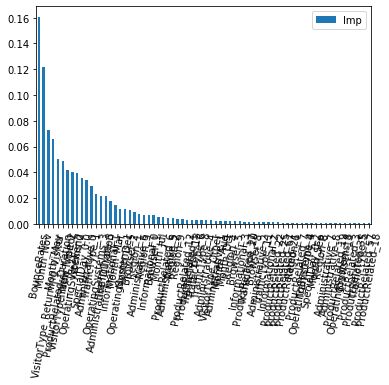

In [203]:
plt.figure(figsize=(20,8))
imp.sort_values('Imp',ascending=False).head(70).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

In [204]:
imp.sort_values('Imp',ascending=False).head()

,Imp
BounceRates,0.160782
Month_Nov,0.121691
VisitorType_Returning_Visitor,0.073091
Month_May,0.065493
ProductRelated_Duration,0.050409


In [205]:
imp.sort_values('Imp',ascending=False).head()

,Imp
BounceRates,0.160782
Month_Nov,0.121691
VisitorType_Returning_Visitor,0.073091
Month_May,0.065493
ProductRelated_Duration,0.050409


len(imp['Imp'])

In [207]:
imp2=imp[imp["Imp"]>0.0005]
len(imp2['Imp'])

68

__Using Random Forest, we found important features:
Among 405 dummy+ continuous variables Random Forest could give us 68 important features.__

In [208]:
imp2.sort_values('Imp',ascending=False).index

Index(['BounceRates', 'Month_Nov', 'VisitorType_Returning_Visitor',
       'Month_May', 'ProductRelated_Duration', 'VisitorType_New_Visitor',
       'TrafficType_2', 'OperatingSystems_2', 'Weekend', 'SpecialDay_0.0',
       'Administrative_0', 'TrafficType_1', 'OperatingSystems_3',
       'Administrative_Duration', 'TrafficType_3', 'Informational_1',
       'Month_Mar', 'OperatingSystems_1', 'Month_Dec', 'Browser_2', 'Region_1',
       'Administrative_6', 'Region_3', 'Informational_0', 'Browser_1',
       'Month_Jul', 'ProductRelated_6', 'Administrative_5', 'Region_2',
       'Region_9', 'ProductRelated_12', 'ProductRelated_1', 'TrafficType_13',
       'TrafficType_6', 'TrafficType_8', 'Administrative_4',
       'VisitorType_Other', 'Administrative_1', 'Month_Aug', 'Month_Oct',
       'Region_4', 'Browser_5', 'Informational_3', 'ProductRelated_17',
       'TrafficType_20', 'Browser_8', 'Administrative_2', 'TrafficType_11',
       'Informational_2', 'ProductRelated_22', 'ProductRelated_

In [211]:
xnew=X_new[imp2.index]
x_train,x_test,y_train,y_test=train_test_split(xnew,Y_new,test_size=0.3,random_state=1)

### Logit Regression

In [212]:
log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))

Train score: 0.6927058174039059
Test score: 0.6929640959587828


In [213]:
log_sm1_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_sm1_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_sm1_pred))

F1 Score: 0.704570100697134
Kappa Score: 0.3865794018531611


### Decision Tree

In [214]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.8464564212269685
Test score: 0.842537433585574


In [215]:
dt_sm1_pred_sm=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_sm1_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,dt_sm1_pred_sm))

F1 Score: 0.8235930735930735
Kappa Score: 0.6843215813714769


### Random Forest

In [216]:
rf_sm1=RandomForestClassifier(n_estimators=50,max_depth=16)
rf_sm1.fit(x_train,y_train)
print('Train score:',rf_sm1.score(x_train,y_train))
print('Test score:',rf_sm1.score(x_test,y_test))

Train score: 0.9592850734938928
Test score: 0.9122524553212044


In [217]:
rf_sm1_pred_sm=rf_sm1.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_sm1_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_sm1_pred_sm))

F1 Score: 0.9049031582620833
Kappa Score: 0.8242098454576354


In [218]:
fpr5,tpr5,thresh=roc_curve(y_test,rf_sm1_pred_sm)
auc5=auc(fpr5,tpr5)

### Gradient Boosting

In [222]:
gb=GradientBoostingClassifier(n_estimators=50,max_depth=5)
gb.fit(x_train,y_train)
print('Train score:',gb.score(x_train,y_train))
print('Test score:',gb.score(x_test,y_test))

Train score: 0.9151887378372783
Test score: 0.9103203992915795


In [223]:
gb_pred_sm=gb.predict(x_test)
print('F1 Score:',f1_score(y_test,gb_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,gb_pred_sm))

F1 Score: 0.9028092828476706
Kappa Score: 0.8203392365502806


In [224]:
fpr6,tpr6,thresh=roc_curve(y_test,gb_pred_sm)
auc6=auc(fpr6,tpr6)

### Plotting ROC Curve for Different Models

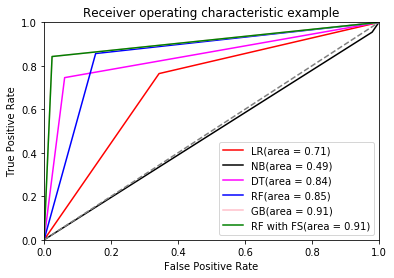

In [225]:
plt.plot(fpr1,tpr1, label='LR(area = %0.2f)' % auc1,color='red')
plt.plot(fpr2, tpr2, label='NB(area = %0.2f)' % auc2,color='black')
plt.plot(fpr3, tpr3, label='DT(area = %0.2f)' % auc3,color='magenta')
plt.plot(fpr4, tpr4, label='RF(area = %0.2f)' % auc4,color='blue')
plt.plot(fpr6, tpr6, label='GB(area = %0.2f)' % auc6,color='pink')
plt.plot(fpr6, tpr6, label='RF with FS(area = %0.2f)' % auc5,color='green')


plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__As observed from findings it is clear that the performance improved with SMOTE.
Among all models Random Forest With Feature Selection gives best accuracy metrics.__

As seen from accuracy metrics and ROC, we can see that Random Forest is best among all as it gives 98% area under, F1 score as 0.90

Transformation improved accuracies for Logistic and Naïve Bayes but it hardly improved Random Forest and Decision Tree. So, we go ahead without transformations as it hardly improves any accuracy.

KNN is a classification technique but due to less computational power we were able to use it. Also, KNN takes more time to

Random Forest was used for feature selection and the important features given by Random Forest are supported by the EDA analysis done.

In [228]:
y = df['Revenue']

In [229]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

### Cross Validating different models

LR: 0.515618 (std=0.139986)
CART: 0.841138 (std=0.136185)
NB: 0.484290 (std=0.387182)
RF: 0.880119 (std=0.114085)
GBM: 0.872441 (std=0.127103)


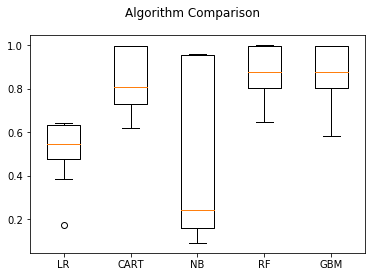

In [230]:
models = []
models.append(('LR', LogisticRegression(penalty='l1',solver='liblinear')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=12345)
    cv_results = cross_val_score(model, xnew, Y_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (std=%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## __Business Insight__

 We suggest to provide discount 3 to 4 days prior to the special day to increase revenue.

 Jan & April require special attention to generate some revenue. Month of Feb has had special days but revenue is very low, hence need to take advantage of that.

 Advertising on other browsers will help to reach new consumers since we do have users using non mainstream browsers.

 Region - We have reach in multiple regions hence an extensive market will help to generate revenue in low generating regions.

 We have to design plans to generate revenue from the new visitors.

 Special offers during weekends has to be promoted since weekend revenue is very low.

 We already have good exit rate during the month of July, June, May and August reducing Bounce rate in that period can result into increased revenue.

 Apart from the regular traffic generator channels special plans needs to be made for other channels also.

 Since lots of pages have low page values, we suggest to make the product search algorithm better so that we can increase pages value.


## __CONCLUSION__
SMOTE has improved our accuracy as the dataset was unbalanced dataset.

Dataset with outliers (without treating outliers) gave us better results.

Transformation did not improve model performance significantly

So, our final model is the Random Forest employed on top of SMOTE, with outliers and without transformations.